### **INTRODUCTION**

> "Size and book-to-market equity combine with market risk to explain stock returns."

This quote from the 1993 article ***Common Risk Factors in the Returns on Stocks and Bonds*** by Eugene F. Fama and Kenneth R. French, published in the Journal of Financial Economics, succinctly summarizes the model we will be studying.

The Fama-French model builds upon the traditional Capital Asset Pricing Model (CAPM), which explains stock returns based solely on their relationship with the global market. However, CAPM fails to account for significant factors like size and book-to-market equity.
During the early 1990s recession, CAPM proved insufficient to represent market conditions accurately. The emergence of market anomalies pushed economists and investors to explore multifactor models that capture the complexities of stock returns more efficiently.

The goal of the Fama-French model is to provide an empirical explanation for expected stock returns by offering a comprehensive framework to evaluate market risk and potential returns.
In this project, we will analyze the model using a:

*  One factor model: the return on the market portfolio.
*  Three factors model: book-to-market equity, size, and the return on the market portfolio.
*   Five factors model: book-to-market equity, size, return on the market portfolio, anticipated profitability, and anticipated corporate investments.

We will apply the model to 25 portfolios to evaluate the significance of each factor in explaining stock returns.

***How does the Fama-French model capture variations in stock returns and identify potential inefficiencies in the financial market?***

We will start by uploading the data and making a few statistical analysis. Then, we will model the five factors with three different regressions and we will identify with a GRS test the significance of coefficients. Lastly, we will use the VaR to predict future stock price.

**Note: please change the repertories path in sections I and II.**


In [ ]:
#Importing the libraries
import pandas as pd #For loading and cleaning the data
import numpy as np #For statistical calculations and matrix transformation
import statsmodels.api as sm #For statistical modeling and tests
import matplotlib.pyplot as plt #To visualize results
import seaborn as sns #To visualize results as well

## I. The 5 factors of Fama-French

#### 1. Data import

The Fama-French 5 factor data is stored in the file "F-F_Research_Data_5_Factors_2x3.csv".

Import monthly observations of these factors from "1963-07-01".

In [ ]:
# Import data and skip the first 3 three lines because they do not contain anything useful informations for our analyse
df = pd.read_csv("/F-F_Research_Data_5_Factors_2x3.csv", skiprows=3)

# Rename the first column as 'Date'
df.rename(columns={"Unnamed: 0": "Date"}, inplace=True)


In [ ]:
# check the types of each column in the data set
print(df.dtypes)

Date      object
Mkt-RF    object
SMB       object
HML       object
RMW       object
CMA       object
RF        object
dtype: object


In [ ]:
# Convert the 'Date' column to string
df['Date'] = df['Date'].astype(str)

# Convert all other columns to numeric
for col in df.columns:
    if col != 'Date':  # Exclude 'Date' column
        df[col] = pd.to_numeric(df[col], errors='coerce')

#### 2. Checking for missing variables

In [ ]:
# Get the row and column indices of missing values
rows, cols = df.isnull().to_numpy().nonzero()

# Combine the indices to locate missing values
missing_locations = list(zip(rows, cols))

# Display the missing locations
print(missing_locations)


[(735, 1), (735, 2), (735, 3), (735, 4), (735, 5), (735, 6), (736, 1), (736, 2), (736, 3), (736, 4), (736, 5), (736, 6)]


In [ ]:
# Delete all the missing values in order to get a clean data set that we can work on
df = df.dropna()

In [ ]:
# Recheck if there is any missing values left
print(df.isnull().sum())

Date      0
Mkt-RF    0
SMB       0
HML       0
RMW       0
CMA       0
RF        0
dtype: int64


#### 3. Date formatting + Risk-free rate

1. Transform dates into dataframe index
2. Store the risk-free rate in a new DataFrame
3. Store the 5 factors presented above in a new DataFrame

In [ ]:
# Because the given data have 2 parts: monthly data and yearly data
# So we separate the initial data into 2 tables
df_m = df.iloc[:735] # monthly data
df_y = df.iloc[735:] # yearly data

In [ ]:
# Reform the 'Date' column in the monthly data frame
df_m.loc[:, "Date"] = pd.to_datetime(df_m["Date"], format="%Y%m").dt.strftime("%Y-%m-%d")

In [ ]:
# Set the 'Date' column as index column
df_m.set_index("Date",inplace=True)
df_y.set_index("Date",inplace=True)

In [ ]:
# Data frame for 5 factors monthly
df_factor_m = df_m[["Mkt-RF", "SMB", "HML", "RMW", "CMA"]]

# Data frame for 5 factors yearly
df_factor_y = df_y[["Mkt-RF", "SMB", "HML", "RMW", "CMA"]]

In [ ]:
# Data frame for risk-free rate monthly
rf_rate_m = df_m[["RF"]]

# Data frame for risk-free rate yearly
rf_rate_y = df_y[["RF"]]

#### 4. Graphical representation of factors

Plot the 5 factors

##### Using Monthly Data Frame

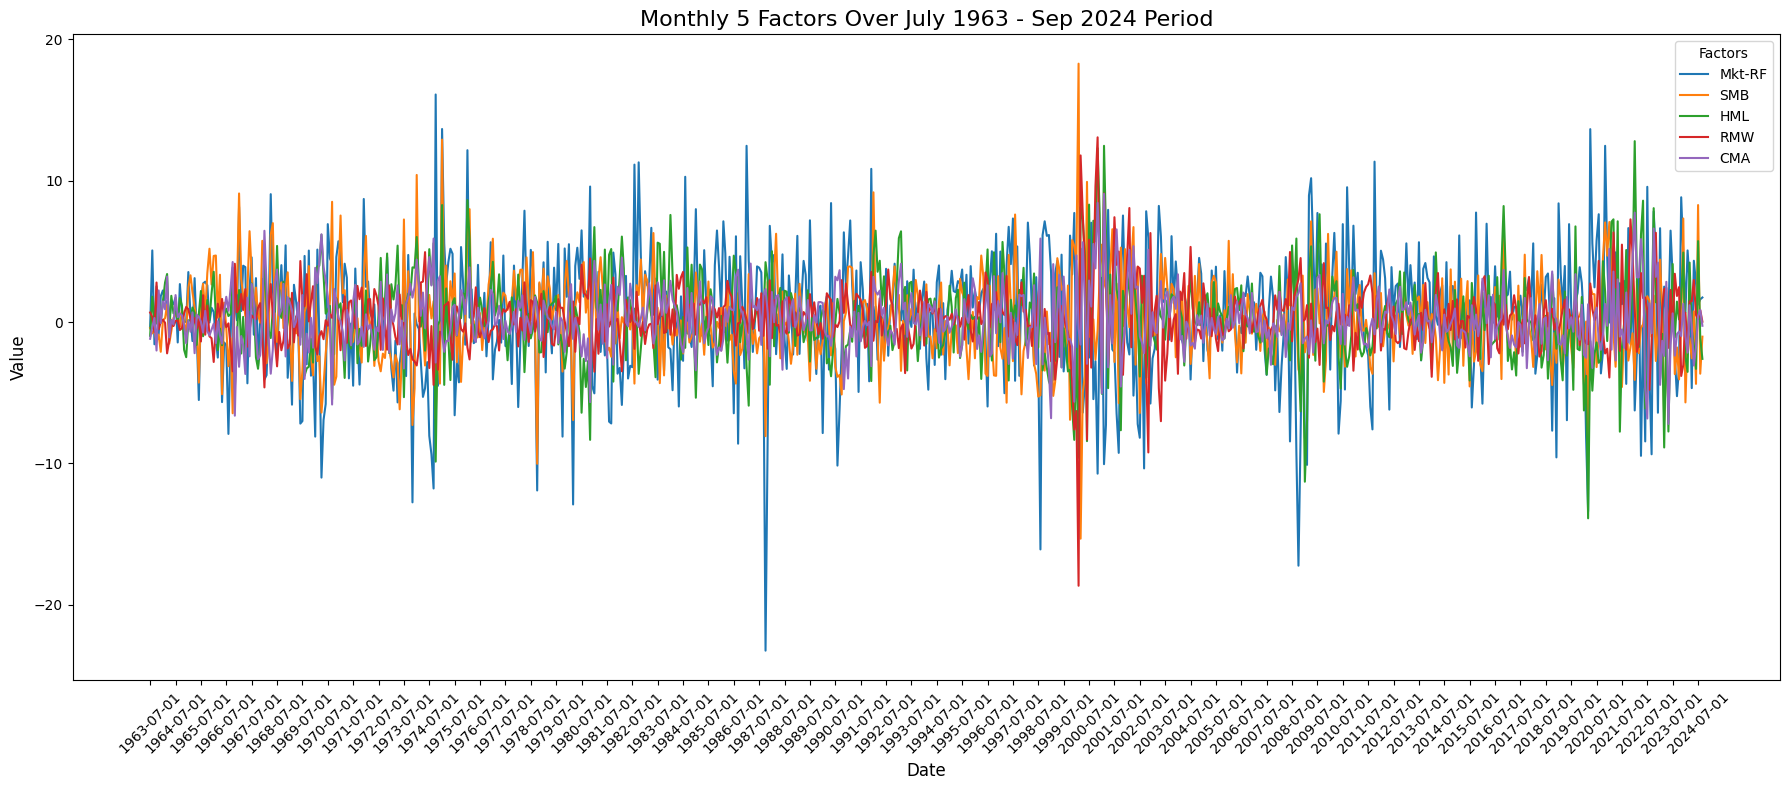

In [ ]:
# A big graph which contains all the 5 factors
import matplotlib.dates as mdates

# Ensure the index is in datetime format
df_factor_m.index = pd.to_datetime(df_factor_m.index)

# Set figure size
plt.figure(figsize=(18, 8))

# Plot all 5 factors
for factor in df_factor_m.columns:
    plt.plot(df_factor_m.index, df_factor_m[factor], label=factor)

# Customize the plot
plt.title("Monthly 5 Factors Over July 1963 - Sep 2024 Period", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.legend(title="Factors", fontsize=10)

# Format x-axis labels to display actual dates from df_factor_m.index
plt.xticks(df_factor_m.index[::12], rotation=45)  # Show one label every 12 months

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

#### **Interpretation**

All the factors seems to fluctuate around 0. However, the amplitude of the variations differs across the factors, and some display higher volatility than others. Out of 5 factors, Market Risk Premium (Mkt - RF) is the most volatile and according to the graph, it shows large spikes, both upward and downward, especially during market crises (Black Monday (Oct 1987); dot-com bubble (end of 1990s); financial crisis (2008); Covid 19..) In contrast, CMA (Conservative Minus Aggressive) is the least volatile. It remains relatively stable, with small fluctuations around 0.



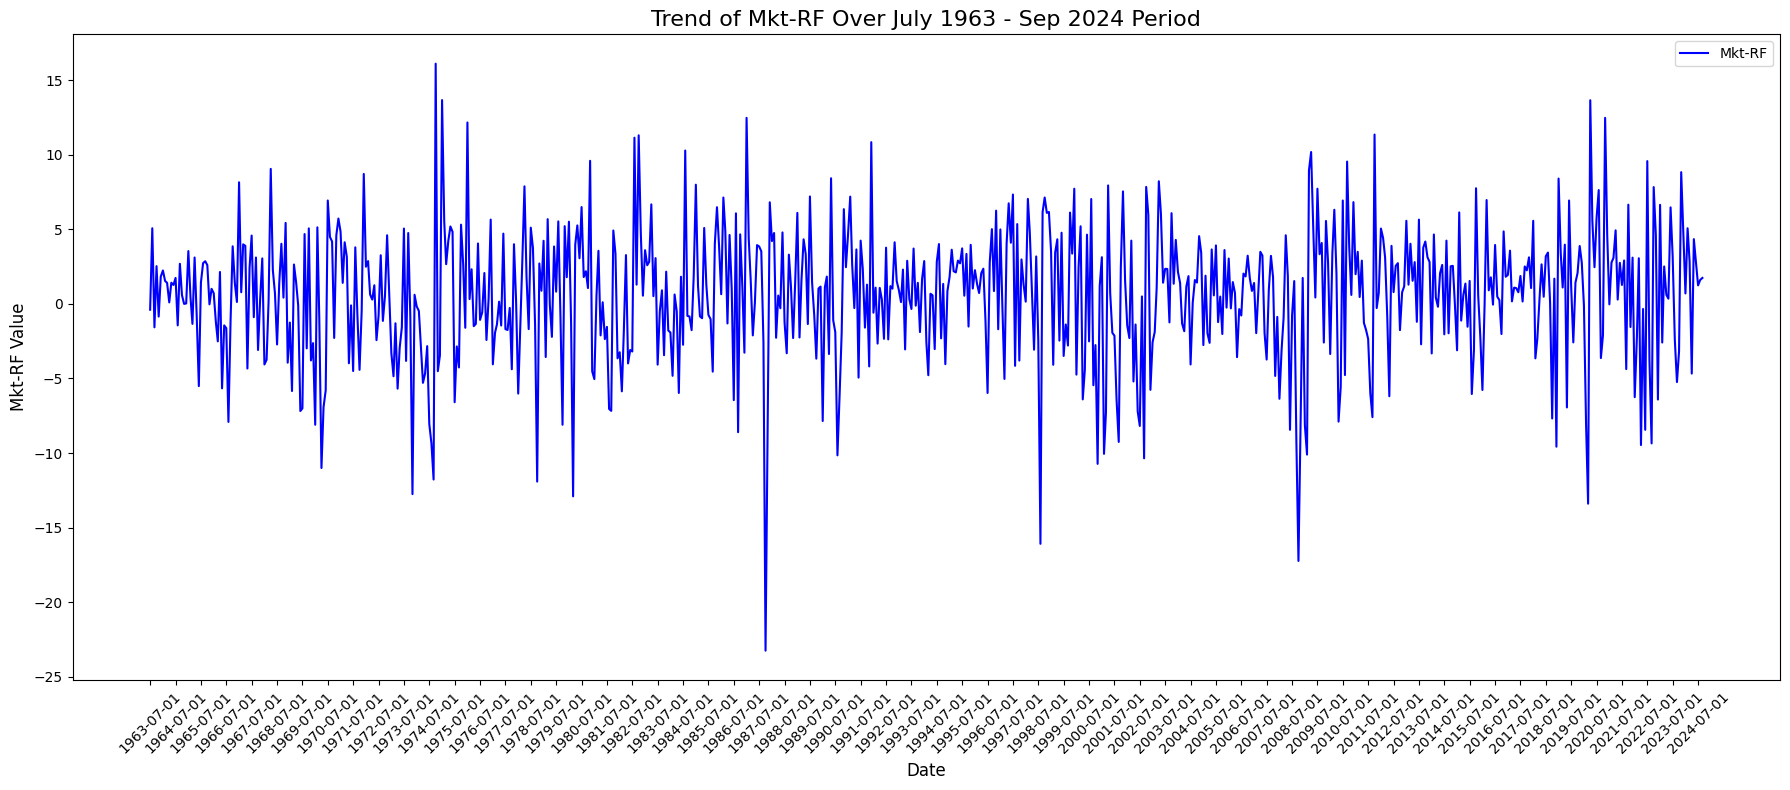

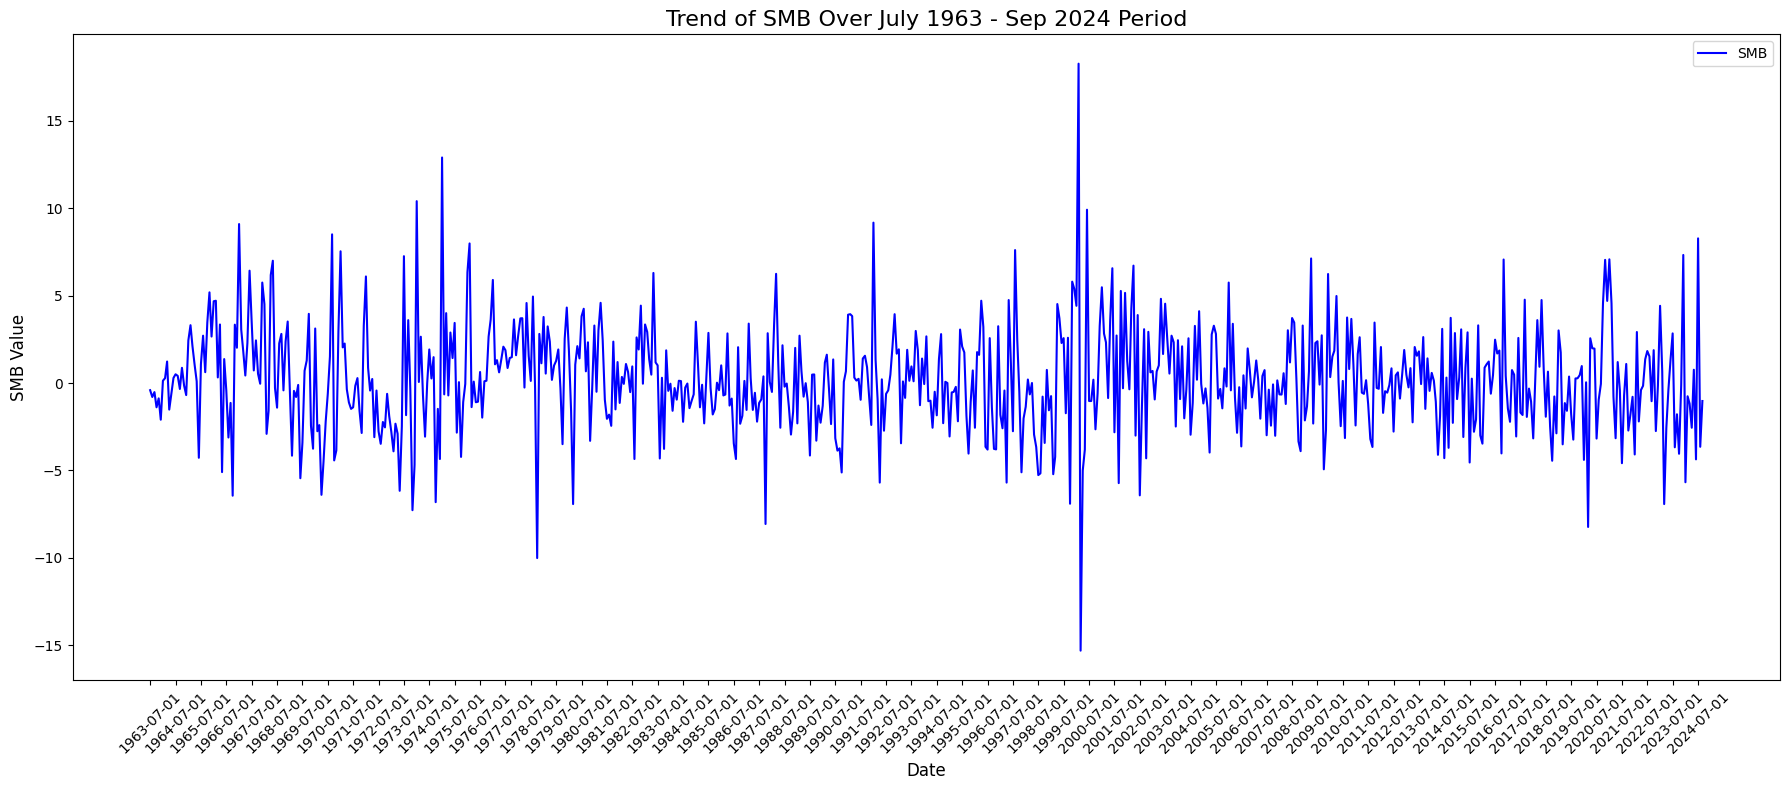

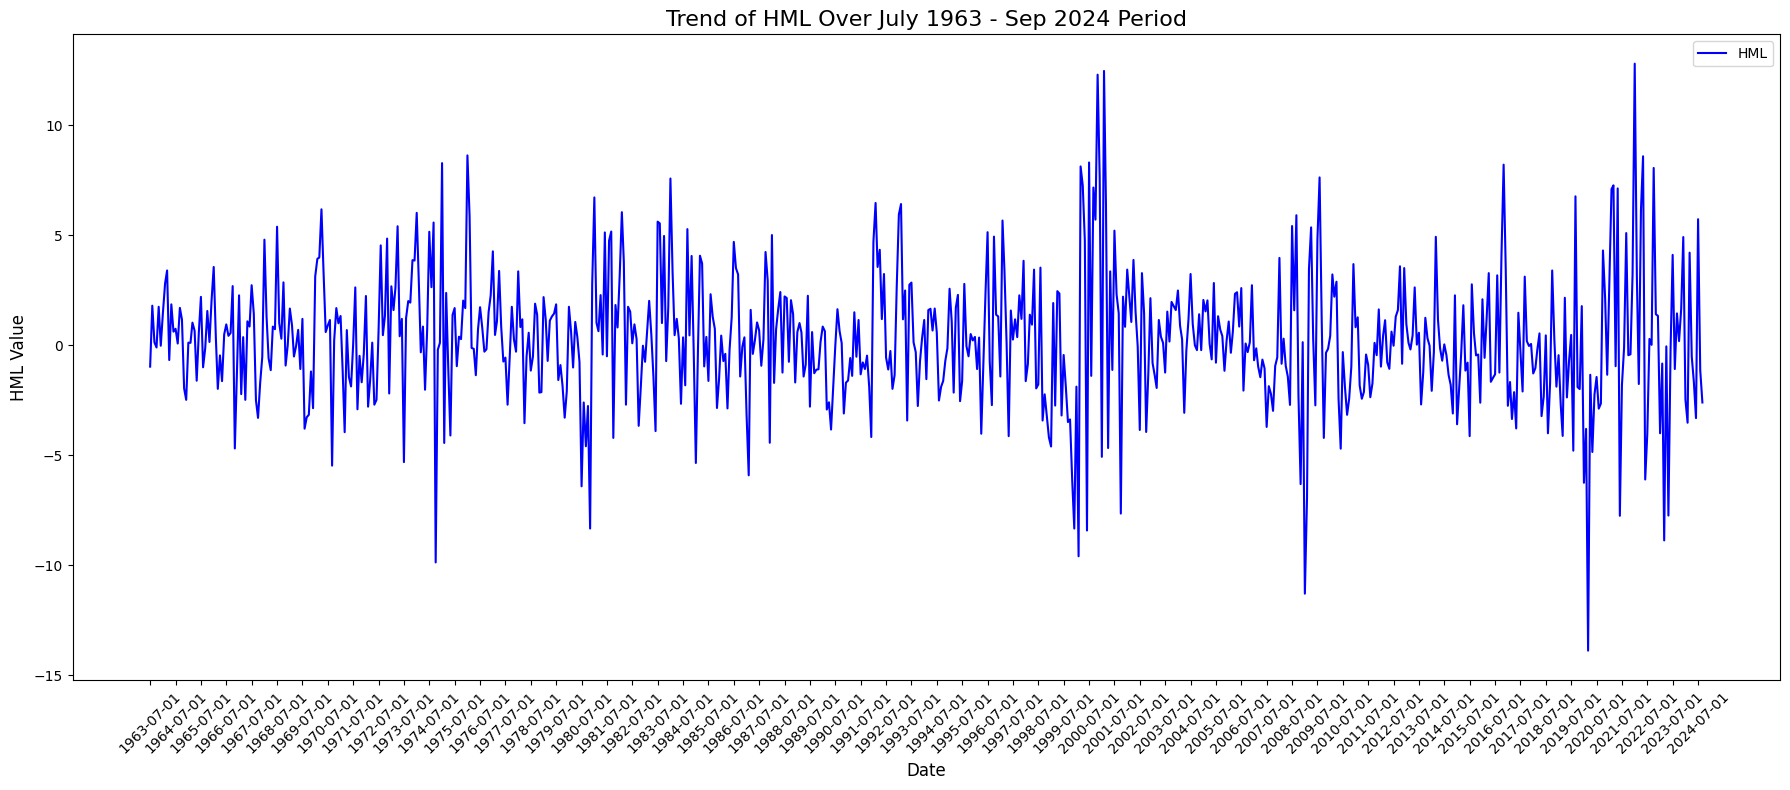

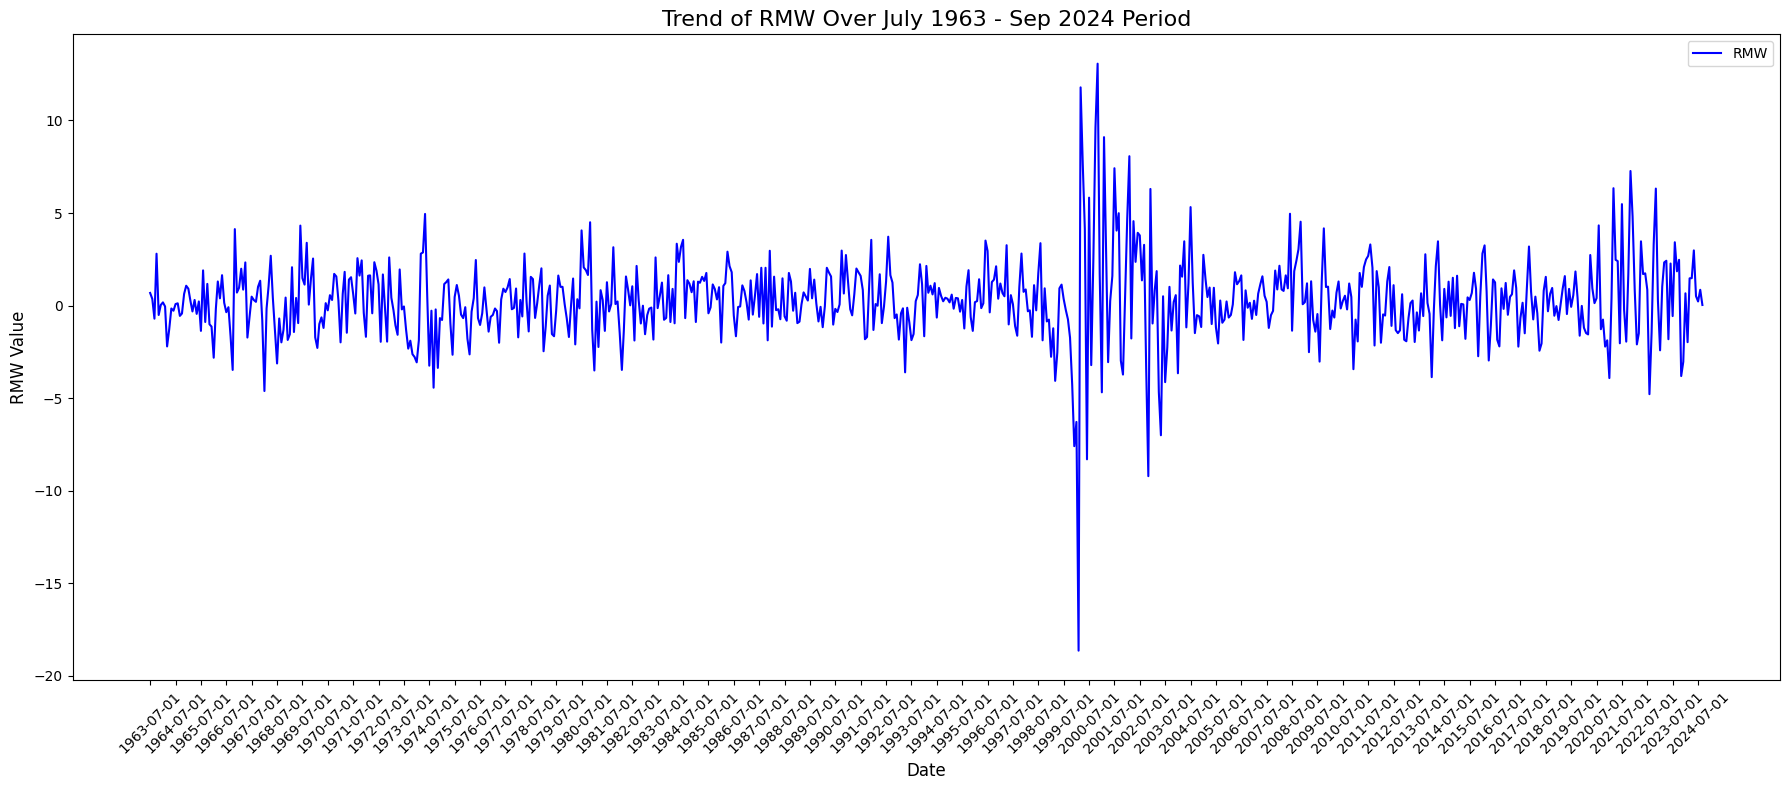

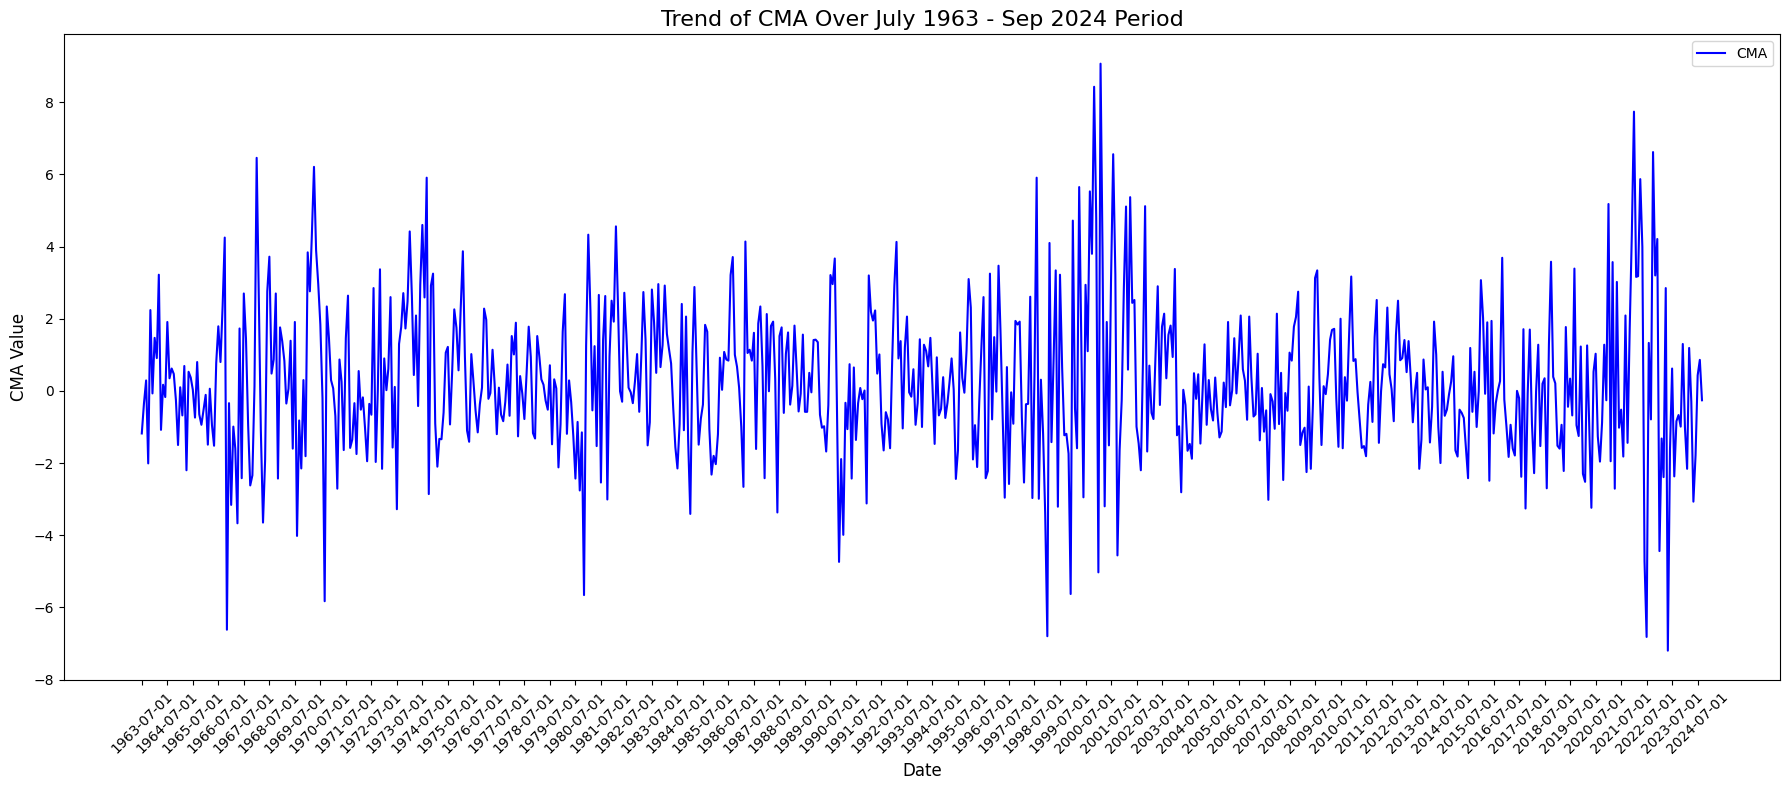

In [ ]:
# A figure for each factor
for factor in df_factor_m.columns:
    plt.figure(figsize=(18, 8))

    # Plot the factor
    plt.plot(df_factor_m.index, df_factor_m[factor], label=factor, color='b')

    # Customize the plot
    plt.title(f"Trend of {factor} Over July 1963 - Sep 2024 Period", fontsize=16)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel(f"{factor} Value", fontsize=12)
    plt.legend(fontsize=10)

    # Format x-axis labels to display actual dates from df_factor_m.index
    plt.xticks(df_factor_m.index[::12], rotation=45)  # Show one label every 12 months

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

##### Using Yearly Data Frame

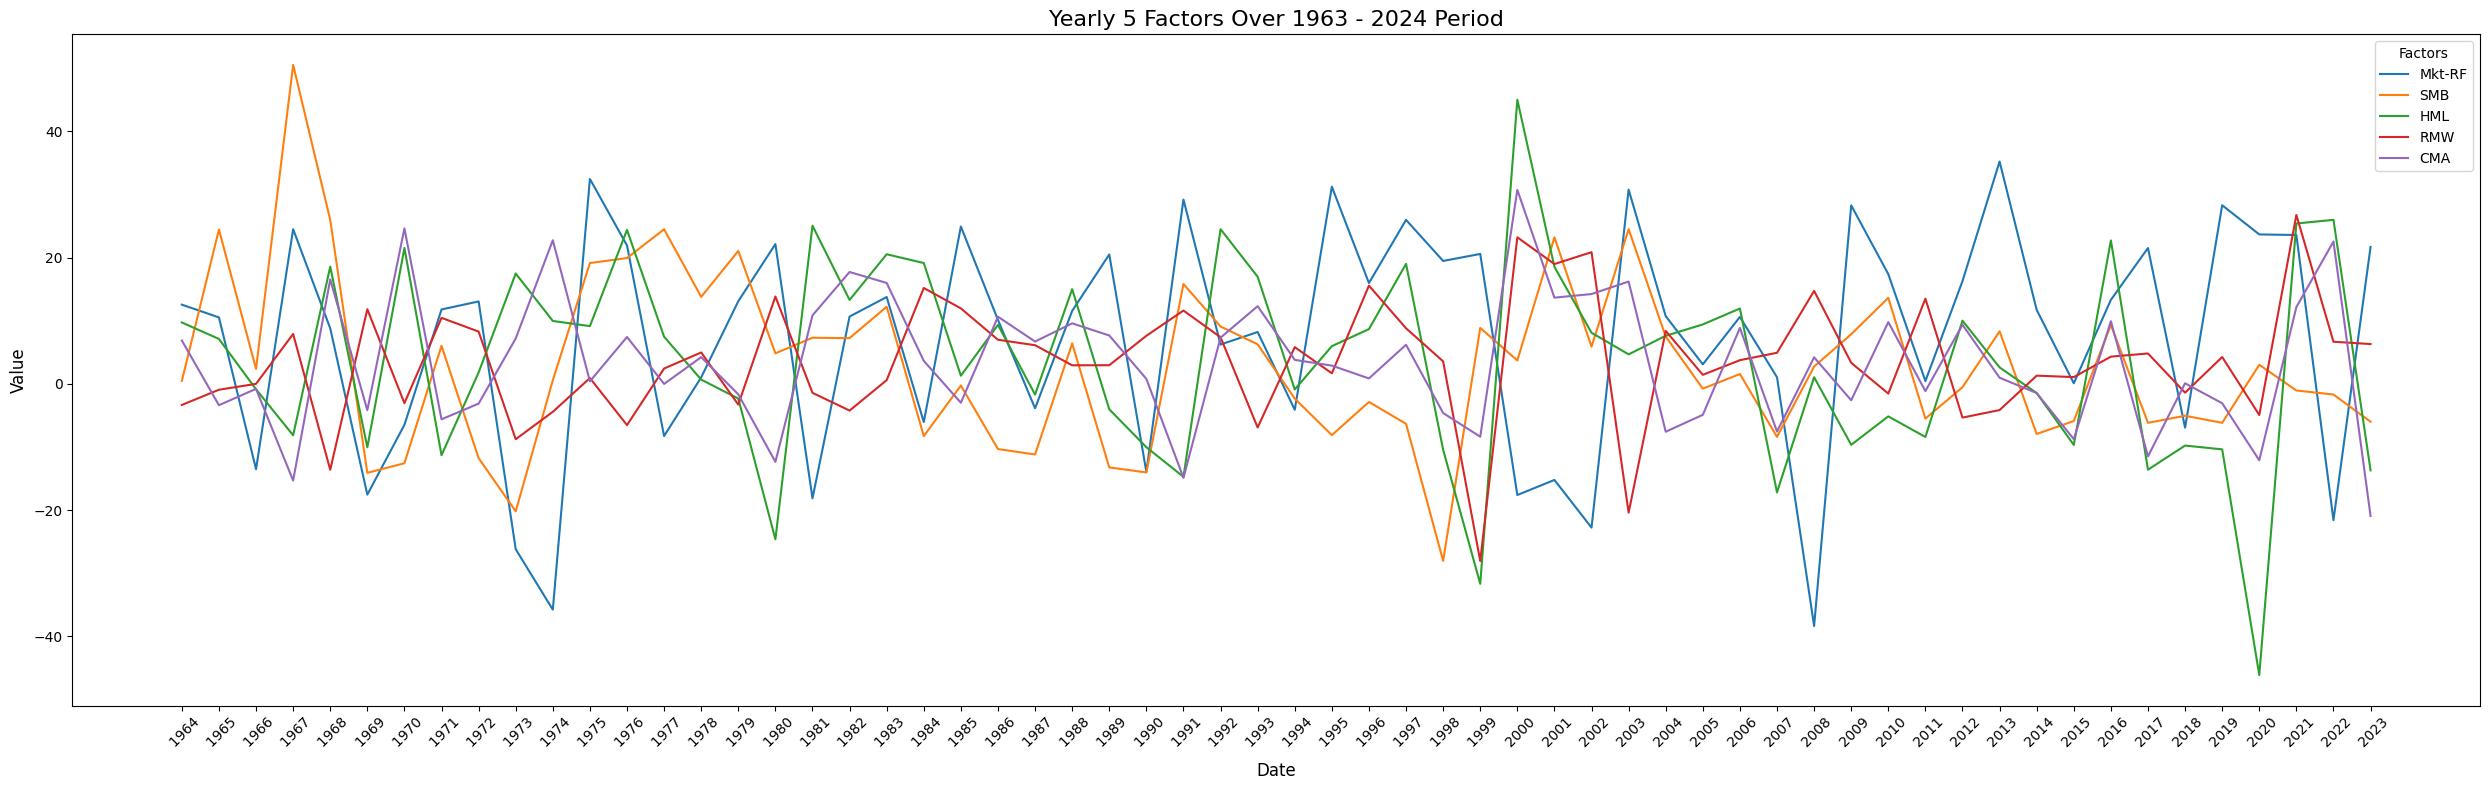

In [ ]:
# A big graph which contains all the 5 factors
# Set figure size
plt.figure(figsize=(25, 8))

# Plot all 5 factors
for factor in df_factor_y.columns:
    plt.plot(df_factor_y.index, df_factor_y[factor], label=factor)

# Customize the plot
plt.title("Yearly 5 Factors Over 1963 - 2024 Period", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.legend(title="Factors", fontsize=10)

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

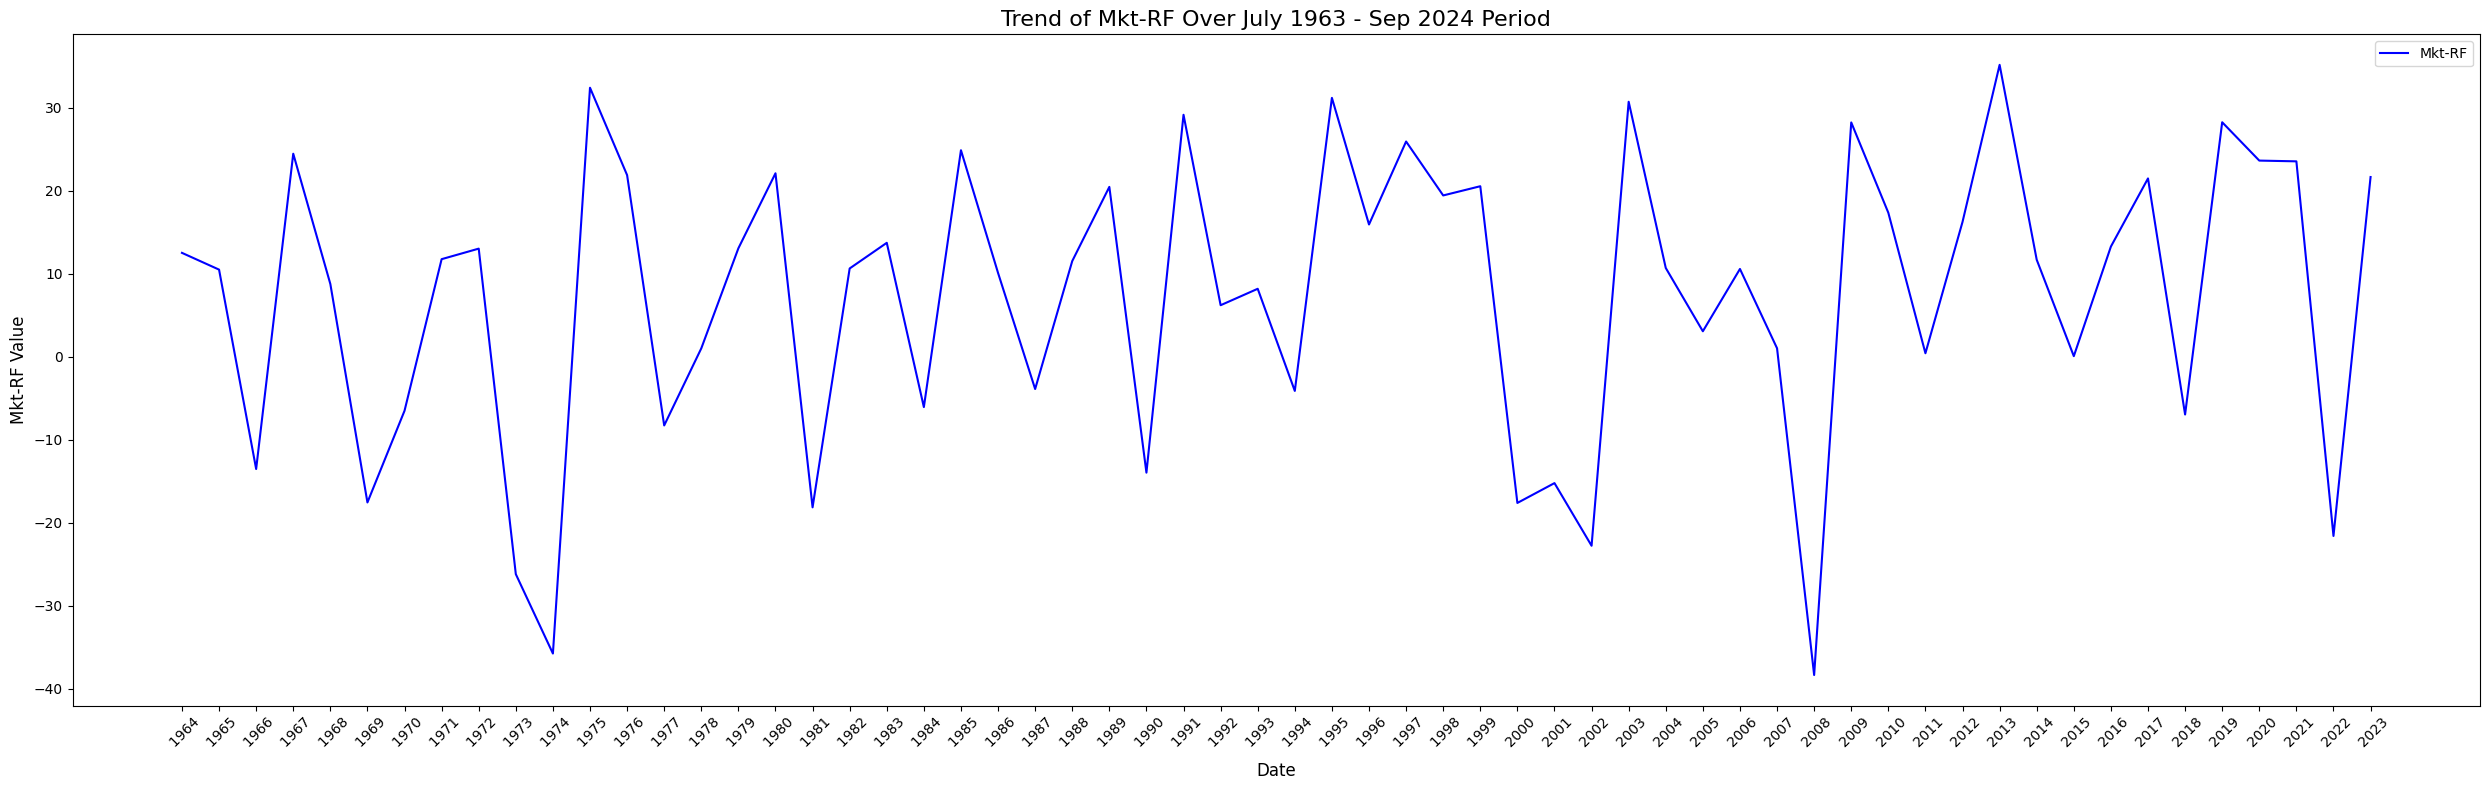

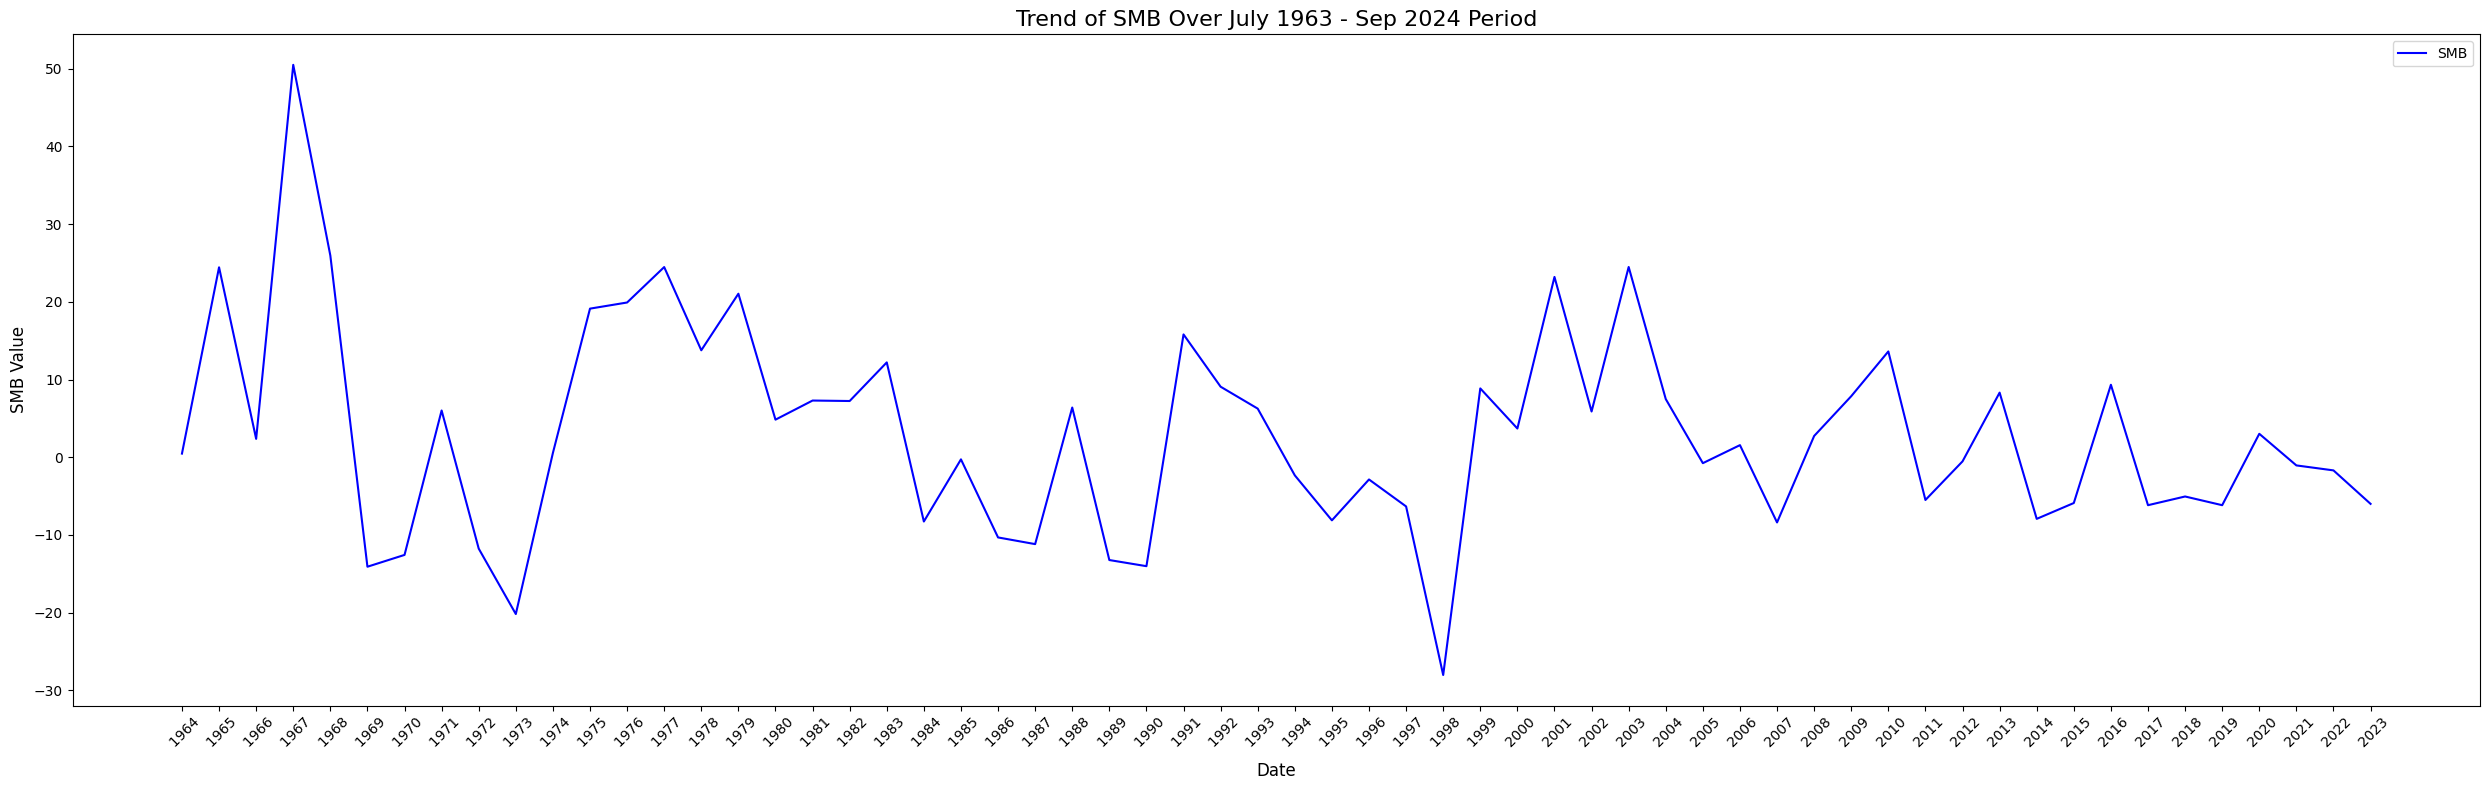

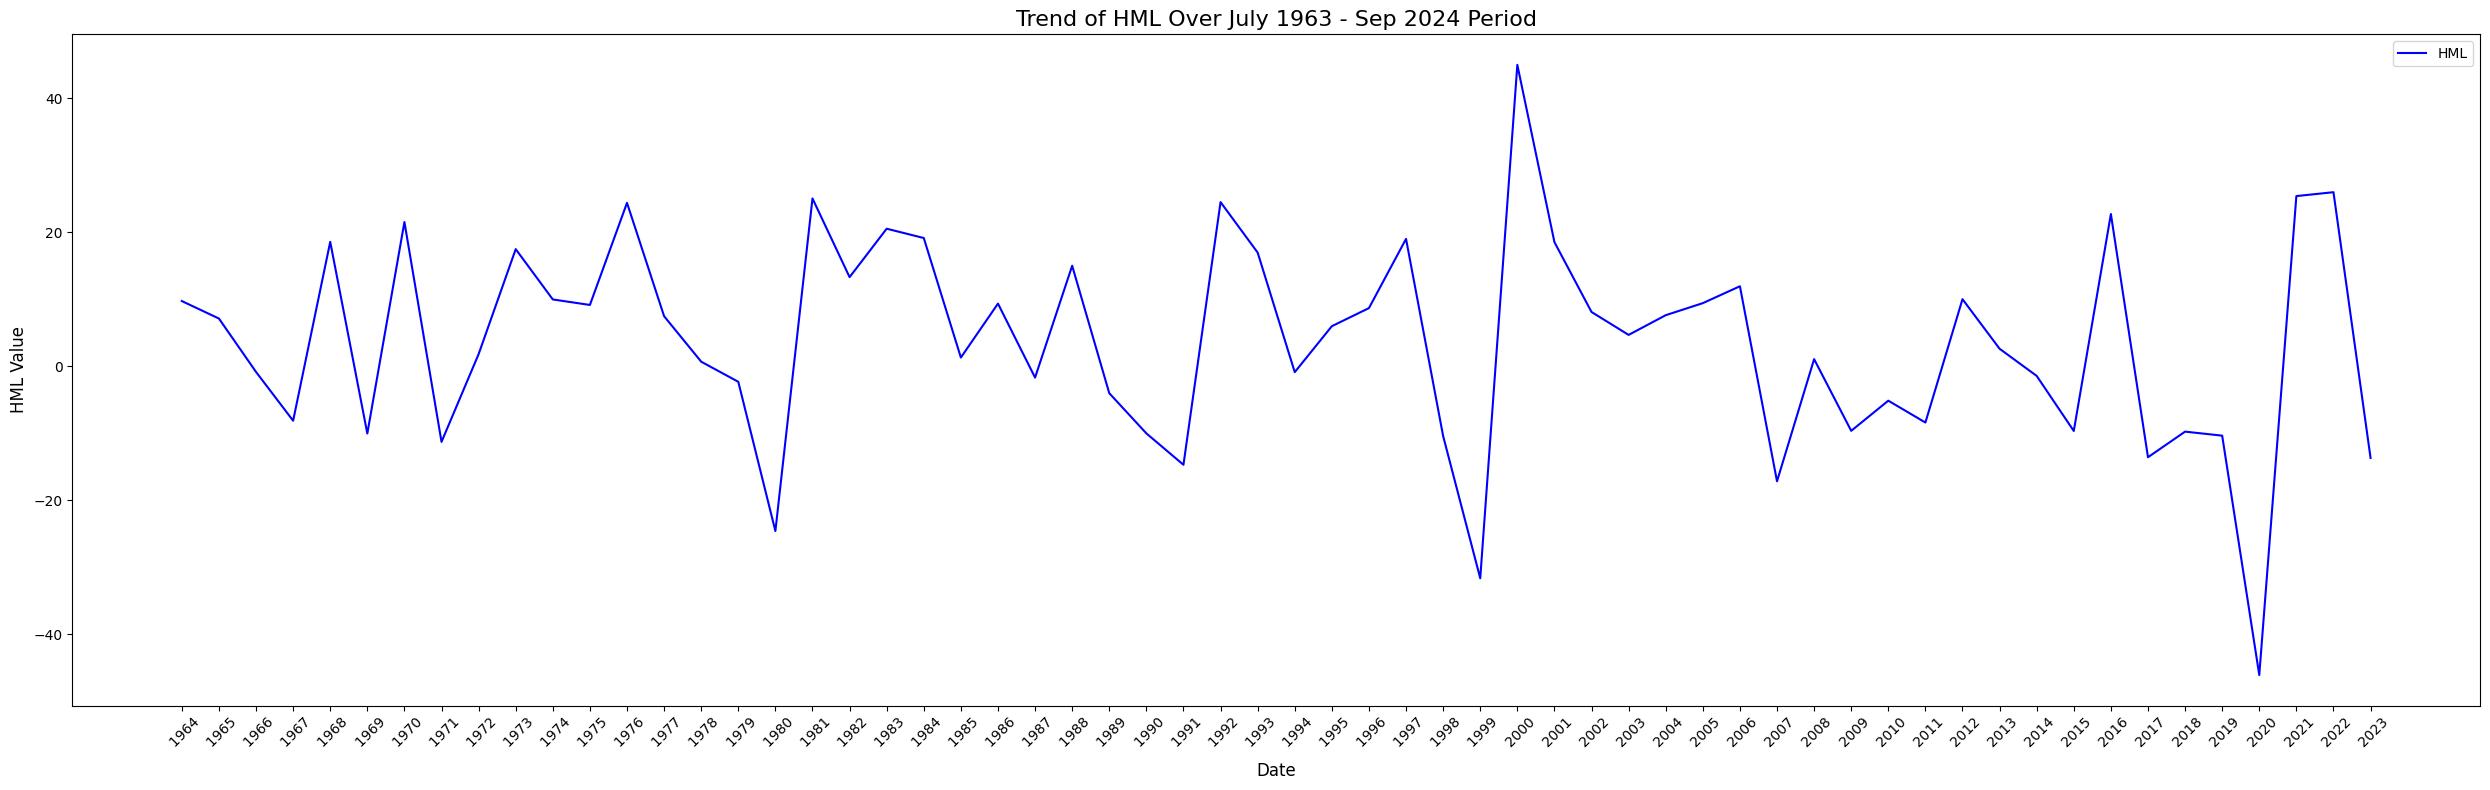

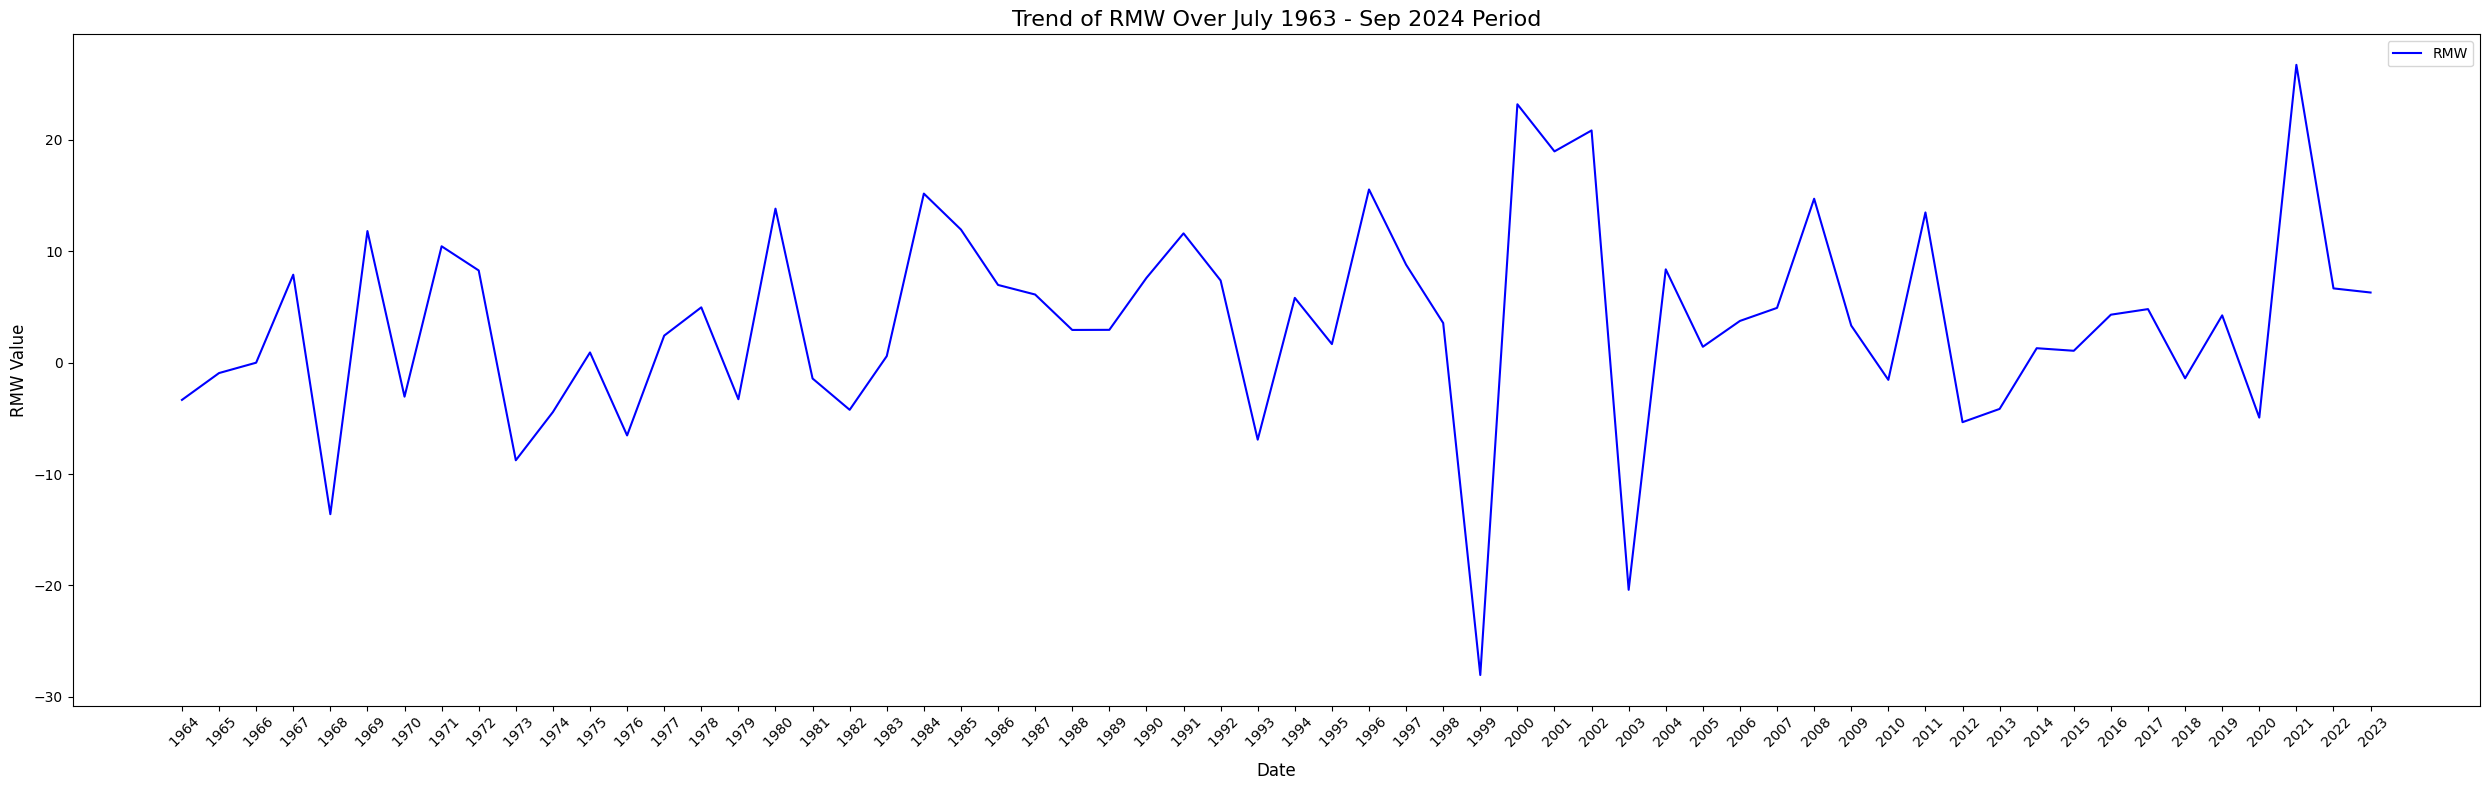

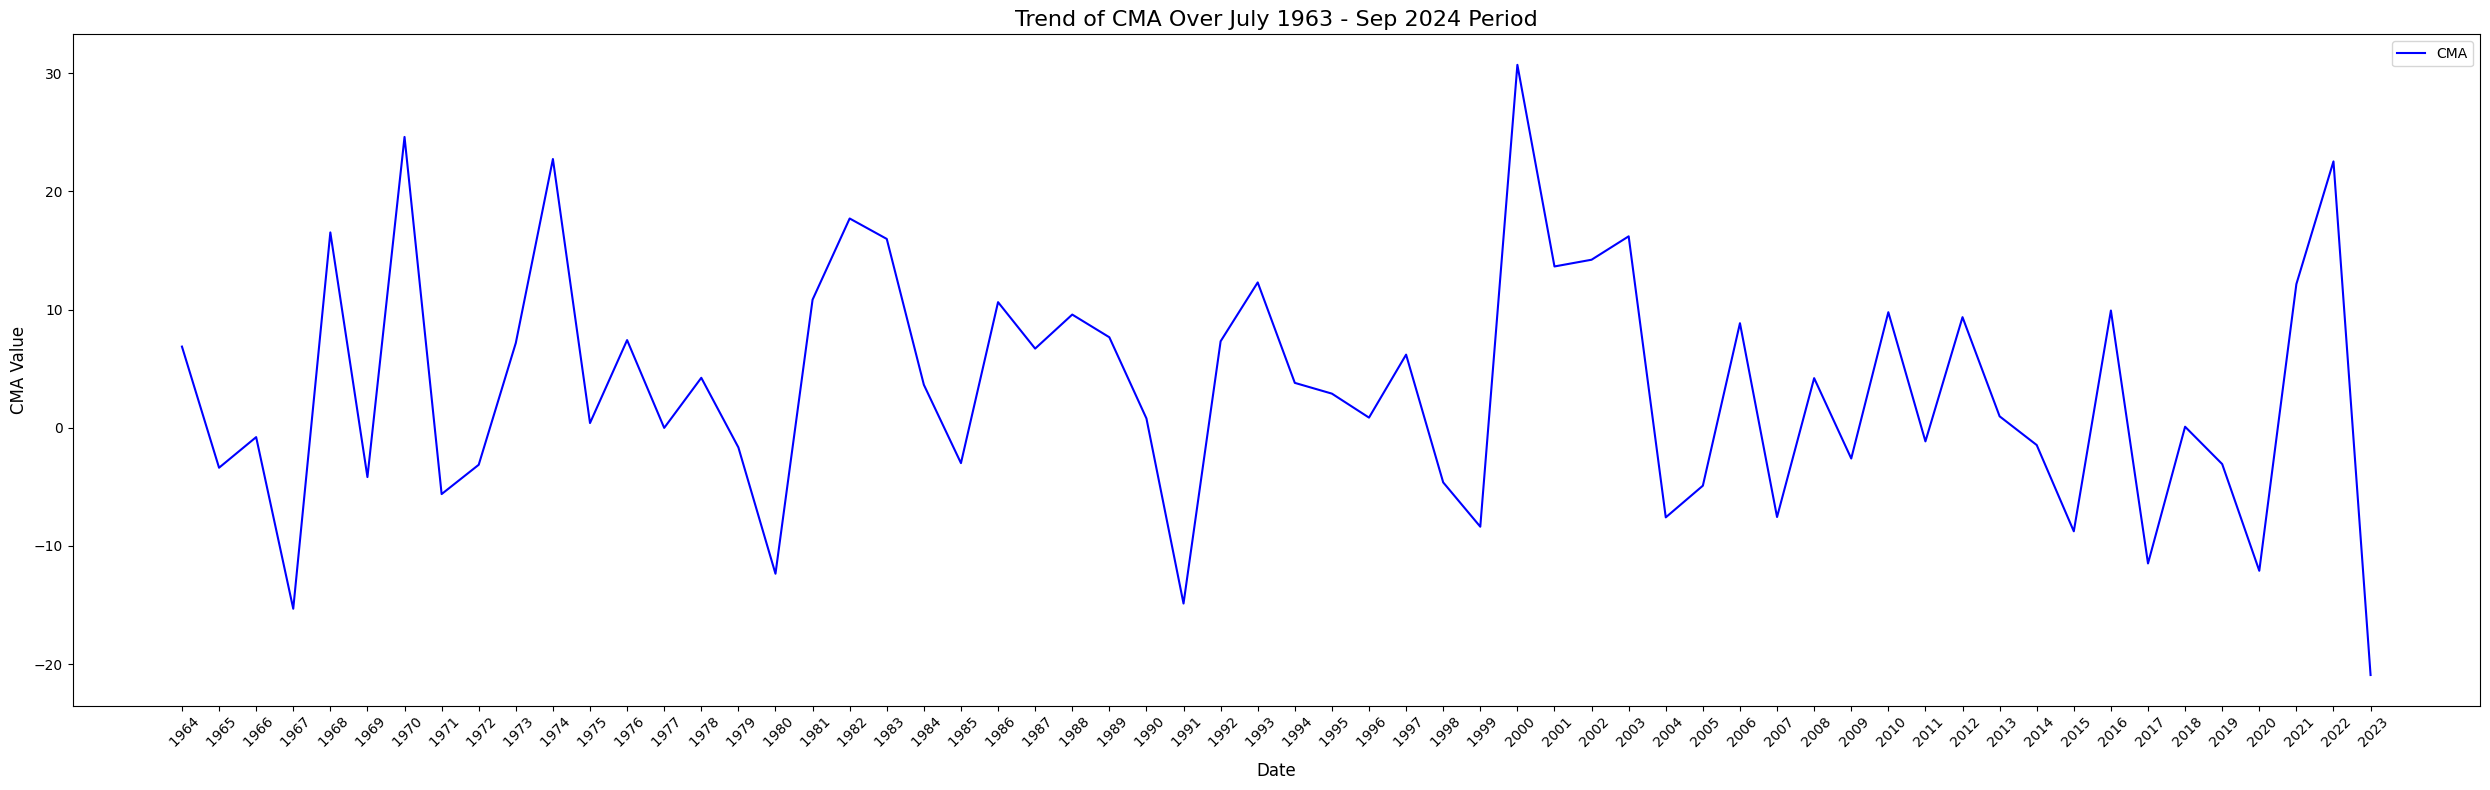

In [ ]:
# A figure for each factor
for factor in df_factor_m.columns:
    plt.figure(figsize=(25, 8))

    # Plot the factor
    plt.plot(df_factor_y.index,df_factor_y[factor], label=factor, color='b')

    # Customize the plot
    plt.title(f"Trend of {factor} Over July 1963 - Sep 2024 Period", fontsize=16)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel(f"{factor} Value", fontsize=12)
    plt.legend(fontsize=10)

    # Rotate date labels for better readability
    plt.xticks(rotation=45)

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

#### 5. Descriptive statistics

Calculate the mean, maximum, minimum, standard deviation, skewness, kurtosis for each factor

     - for the entire sample
     - per year
     - per month

In [ ]:
from scipy.stats import skew, kurtosis

##### For the entire sample

In [ ]:
# List of 5 factors to analyze
factors = ["Mkt-RF", "SMB", "HML", "RMW", "CMA"]

# Initialize the stats dictionary that we store all the descriptive statistics
stats = {}

# Loop through each factor and calculate the statistics
for factor in factors:
    factor_array = df_factor_m[factor].to_numpy()  # Convert column to array
    stats[factor] = {
        'mean': np.mean(factor_array),
        'std': np.std(factor_array),
        'median': np.median(factor_array),
        'min': np.min(factor_array),
        'max': np.max(factor_array),
        'skewness': skew(factor_array, bias=False),
        'kurtosis': kurtosis(factor_array, bias=False)
    }

# Convert the stats dictionary to a DataFrame
stats_table = pd.DataFrame(stats).T  # Transpose to make factors the rows

# Display the table
print(stats_table)

            mean       std  median    min    max  skewness   kurtosis
Mkt-RF  0.582449  4.478042    1.01 -23.24  16.10 -0.502225   1.748906
SMB     0.197850  3.045424    0.07 -15.32  18.28  0.351968   2.927680
HML     0.281469  2.996354    0.20 -13.88  12.80  0.087390   2.252557
RMW     0.289075  2.215144    0.26 -18.65  13.07 -0.279174  10.988126
CMA     0.260735  2.071918    0.09  -7.20   9.07  0.274071   1.468854


1. **Mkt-RF**: It has a mean of 0.582449, indicating a positive average return. The standard deviation of 4.78042 suggests significant volatility in market returns. The skewness of -0.502225 and kurtosis of 1.748906 (which is much lower than 3) indicate that the distribution of market returns is negatively skewed and has light tails (less extreme values than a normal distribution).

2. **SMB**: It has a mean of 0.197850, suggesting that small-cap stocks have historically outperformed large-cap stocks on average. The standard deviation of 3.045424 indicates significant volatility in size factor returns. The skewness of 0.351968 and kurtosis of 2.927680 (which is slightly less than 3) indicate a positively skewed and light-tailed, flat-peaked distribution (platykurtic).

3. **HML**: It has a mean of 0.281469, suggesting that stocks with high B/M have historically outperformed stocks  with low B/M on average. The standard deviation of 2.996354 indicates significant volatility in value factor returns. The skewness of 0.087390 and kurtosis of 2.252557 (which is slightly les than 3) indicate a slightly positively skewed and platykurtic distribution.

4. **RMW**: It has a mean of 0.289075, suggesting that profitable stocks have historically outperformed unprofitable stocks on average. The standard deviation of 2.215144 indicates moderate volatility in profitability factor returns. The skewness of -0.279174 and kurtosis of 10.988126 (which is much more than 3) indicate a negatively skewed and heavy-tailed, sharp-peaked distribution (leptokurtic).

5. **CMA**: It has a mean of 0.260735, suggesting that conservative stocks have historically outperformed aggressive stocks on average. The standard deviation of 2.071918 indicates moderate volatility in investment style factor returns. The skewness of 0.274071 and kurtosis of 1.468854 (less than 3) indicate a positively skewed and platykurtic distribution.

Overall, the table shows that all five factors have positive average returns, indicating that they have historically been rewarded in the market. However, they also perform significant volatility and non-normal distributions, which highlights the risks associated with investing in these factors.

##### Descriptive Statistics Per YEAR

In [ ]:
# Add column year in the data frame using the index column and take the first 4 characters
df_factor_m['Year'] = df_factor_m.index.year

# Initialize a dictionary to store statistics tables
factor_stats_tables = {}

# Loop through each factor and calculate the statistics
for factor in factors:
    # Group by 'Year' and calculate statistics for each year
    stats = df_factor_m.groupby('Year')[factor].apply(
        lambda x: pd.Series({
            'mean': np.mean(x.dropna()),
            'max': np.max(x.dropna()),
            'min': np.min(x.dropna()),
            'std': np.std(x.dropna()),
            'skew': skew(x.dropna(), bias=False),
            'kurt': kurtosis(x.dropna(), bias=False)
        })
    )

    # Store the statistics in the dictionary
    factor_stats_tables[factor] = stats

# Print each table
for factor, table in factor_stats_tables.items():
    print(f"\nStatistics for {factor}:\n")
    print(table)


Statistics for Mkt-RF:

Year      
1963  mean    1.103333
      max     5.070000
      min    -1.570000
      std     2.290929
      skew    0.679742
                ...   
2024  max     5.070000
      min    -4.670000
      std     2.635956
      skew   -1.523055
      kurt    3.573119
Name: Mkt-RF, Length: 372, dtype: float64

Statistics for SMB:

Year      
1963  mean   -1.016667
      max    -0.410000
      min    -2.100000
      std     0.576387
      skew   -1.150006
                ...   
2024  max     8.280000
      min    -5.680000
      std     3.827749
      skew    1.666171
      kurt    3.752373
Name: SMB, Length: 372, dtype: float64

Statistics for HML:

Year      
1963  mean    0.431667
      max     1.800000
      min    -0.970000
      std     1.012644
      skew    0.402092
                ...   
2024  max     5.730000
      min    -3.520000
      std     3.126614
      skew    1.323873
      kurt    0.476894
Name: HML, Length: 372, dtype: float64

Statistics for RMW

##### Descriptive Statistics Per MONTH

In [ ]:
# Add column Month in the data frame
df_factor_m['Month'] = df_factor_m.index.month

# Initialize a dictionary to store statistics tables
factor_stats_tables = {}

# Loop through each factor and calculate the statistics
for factor in factors:
    # Group by 'Month' and calculate statistics for each month
    stats = df_factor_m.groupby('Month')[factor].apply(
        lambda x: pd.Series({
            'mean': np.mean(x.dropna()),
            'max': np.max(x.dropna()),
            'min': np.min(x.dropna()),
            'std': np.std(x.dropna()),
            'skew': skew(x.dropna(), bias=False),
            'kurt': kurtosis(x.dropna(), bias=False)
        })
    )

    # Store the statistics in the dictionary
    factor_stats_tables[factor] = stats

# Print each table
for factor, table in factor_stats_tables.items():
    print(f"\nStatistics for {factor}:\n")
    print(table)



Statistics for Mkt-RF:

Month      
1      mean     1.079016
       max     13.660000
       min     -8.120000
       std      4.998704
       skew     0.243411
                 ...    
12     max     10.840000
       min     -9.570000
       std      3.612360
       skew    -0.151872
       kurt     1.082678
Name: Mkt-RF, Length: 72, dtype: float64

Statistics for SMB:

Month      
1      mean     1.581967
       max     12.910000
       min     -5.680000
       std      3.876460
       skew     0.644583
                 ...    
12     max      7.330000
       min     -4.690000
       std      2.605298
       skew     0.317026
       kurt    -0.103571
Name: SMB, Length: 72, dtype: float64

Statistics for HML:

Month      
1      mean     1.112131
       max     12.800000
       min    -11.290000
       std      3.939966
       skew    -0.062292
                 ...    
12     max      7.610000
       min     -8.330000
       std      2.531443
       skew    -0.320492
       kurt     

#### 6. Correlation matrix
1. Estimate the factor correlation matrix and comment
2. Make a graphical representation of this matrix
3. Check the significance of the correlation between the factors $HML$ and $SMB$

In [ ]:
# Compute the correlation matrix for the factors
correlation_matrix = df_factor_m[["Mkt-RF", "SMB", "HML", "RMW", "CMA"]].corr()

# Display the correlation matrix
print(correlation_matrix)

          Mkt-RF       SMB       HML       RMW       CMA
Mkt-RF  1.000000  0.278417 -0.204437 -0.186513 -0.361276
SMB     0.278417  1.000000  0.003154 -0.352045 -0.085387
HML    -0.204437  0.003154  1.000000  0.083331  0.684922
RMW    -0.186513 -0.352045  0.083331  1.000000 -0.014063
CMA    -0.361276 -0.085387  0.684922 -0.014063  1.000000


1. **HML and CMA**: The correlation between HML and CMA is 0.684922. This strong positive correlation implies that HML and CMA capture overlapping information. It also suggests that these two factors tend to move together: firms with value stocks (high HML) tend to follow conservative investment strategies (high CMA).

2. **Mkt-RF and CMA**: The correlation between Mkt-RF and CMA is -0.361276. This negative correlation indicates that firms with conservative investment policies (high CMA) tend to underperform when markets are strong and outperform in downturns.

3. **Mkt-RF and HML**: The correlation between Mkt-RF and HML is -0.204437. This negative correlation suggests that value stocks (high HML) tend to underperform during bull markets and outperform during bear markets. Growth stocks (low HML) are more sensitive to market conditions, performing well in strong markets, while value stocks (high HML) are seen as defensive, providing downside protection in recessions.

4. **SMB and RMW**: The correlation between SMB and RMW is -0.352045. This negative correlation suggests that small-cap stocks tend to be less profitable than large-cap stocks.


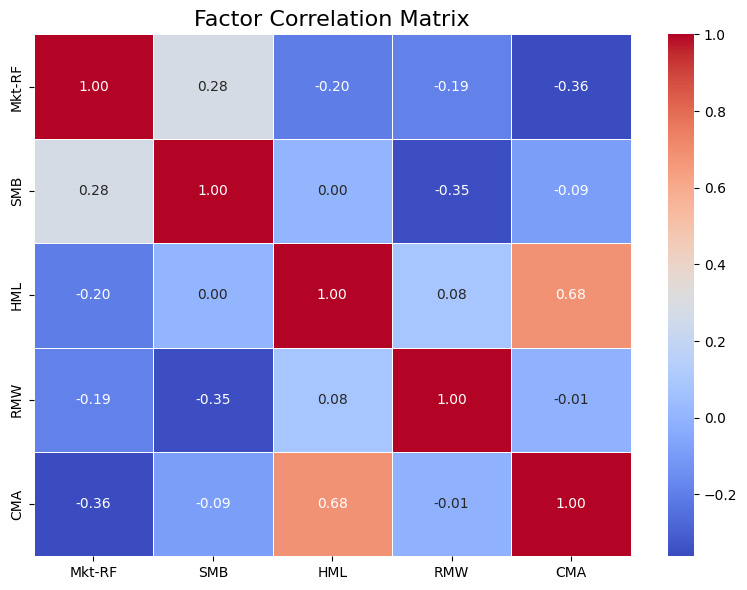

In [ ]:
# Set up the size of the plot
plt.figure(figsize=(8, 6))

# Plot the heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)

# Customize the plot
plt.title("Factor Correlation Matrix", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import pearsonr

# Calculate the Pearson correlation and p-value between HML and SMB
corr, p_value = pearsonr(df_factor_m['HML'], df_factor_m['SMB'])

# Print the correlation and p-value
print(f"Correlation between HML and SMB: {corr:.2f}")
print(f"P-value: {p_value:.4f}")

# Display the comment on significance
if p_value < 0.05:
    print("The correlation between HML and SMB is statistically significant.")
else:
    print("The correlation between HML and SMB is not statistically significant.")


Correlation between HML and SMB: 0.00
P-value: 0.9320
The correlation between HML and SMB is not statistically significant.


## II. The 25 portfolios formed from Size and OP

#### 1. Data import

1. Import the data (Average Value Weighted Returns -- monthly)
2. Transform the dates into yyyy-mm-01 format (example 196307 becomes 1963-07-01)
3. Transform dates into indices

In [ ]:
#Import Data
portfolios_file = "/25_Portfolios_ME_OP_5x5_Wout_Div.CSV"
portfolios= pd.read_csv(portfolios_file, skiprows=22,nrows=735, sep=",")
# Date transformation
portfolios.columns.values[0] ='Date'
portfolios['Date'] = pd.to_datetime(portfolios['Date'], format='%Y%m') + pd.offsets.MonthBegin(0)
# Fixing the date as an index
portfolios.set_index('Date',inplace=True)
portfolios

SMALL LoOP  ME1 OP2  ME1 OP3  ME1 OP4  SMALL HiOP  ME2 OP1  \
Date                                                                     
1963-07-01     -0.6705   1.2181   2.4664  -0.9614     -1.1993  -1.2551   
1963-08-01      2.1994   3.6919   2.2153   2.3272      4.0410   6.2016   
1963-09-01     -1.5825  -1.1712  -2.2143   4.0691     -1.6038  -1.9994   
1963-10-01      0.1584  -1.0551   1.1348   3.0337      0.2181   3.5349   
1963-11-01     -2.3473  -1.7879  -3.6168  -2.6146     -3.3887  -1.6161   
...                ...      ...      ...      ...         ...      ...   
2024-05-01      4.1198   5.3426   4.3816   4.7814      4.5904   3.8544   
2024-06-01     -4.8752  -0.7808   0.0008  -2.1253     -5.9886  -1.9995   
2024-07-01     11.5466  13.8663  16.2904  13.3898     13.0772   9.9407   
2024-08-01     -3.8629  -1.0325  -2.9735  -2.1832     -4.3960  -0.2239   
2024-09-01     -0.7997  -0.5262   0.2343   1.3325     -0.0165   0.4011   

            ME2 OP2  ME2 OP3  ME2 OP4  ME2 OP5  ...  ME4 OP1  ME4 OP2  \
Date                                            ...                     
1963-07-01  -2.1457  -1.1506   0.6419   0.3073  ...  -3.6017  -0.6540   
1963-08-01   5.4030   3.4699   4.6566   3.5437  ...   4.8709   4.9670   
1963-09-01  -1.9601  -0.0890  -2.5102  -4.2698  ...  -1.9026  -1.4033   
1963-10-01   2.9549   1.0929  -1.4399   4.6419  ...   2.9412   0.2448   
1963-11-01  -0.7255  -0.3999  -1.6184  -2.3957  ...  -0.5446  -1.5143   
...             ...      ...      ...      ...  ...      ...      ...   
2024-05-01   6.8604   5.3000   1.2980   4.4345  ...   2.6337   3.2285   
2024-06-01  -0.7888  -0.6553  -3.8148  -5.6487  ...   1.6365  -2.7266   
2024-07-01   9.5688  12.2287  11.7705  12.0524  ...   4.0636   6.0217   
2024-08-01  -2.3897  -2.5323  -3.5827   0.2448  ...   2.3842   0.9882   
2024-09-01   0.0427  -0.2255  -0.0395   1.1771  ...   3.7280   1.5599   

            ME4 OP3  ME4 OP4  ME4 OP5  BIG LoOP  ME5 OP2  ME5 OP3  ME5 OP4  \
Date                                                                         
1963-07-01  -2.1827  -1.4483  -0.0358    0.2036   1.3578  -0.0689  -1.1041   
1963-08-01   5.9343   4.1942   6.2595    4.1981   3.6953   4.7542   5.3736   
1963-09-01  -2.5062  -3.0080  -2.4167   -2.5485  -2.3196   0.8222  -2.0080   
1963-10-01   1.6633  -0.8305   2.9515   -0.1189  -0.1349   2.2829   2.9912   
1963-11-01  -0.5209  -0.7213   0.3579   -1.6703  -1.8024   0.7283   0.3042   
...             ...      ...      ...       ...      ...      ...      ...   
2024-05-01   1.7032   3.3783   3.8635   -0.4797   3.1384   2.6341   7.4916   
2024-06-01  -1.1401  -2.5486  -2.5139    2.5031  -1.3018   2.6590   5.0923   
2024-07-01   6.8812   6.5472   4.9491   -5.2700   5.0940   6.6687  -1.8723   
2024-08-01   1.7099   1.2642   0.6569   -2.5075   2.9106   1.6475   1.8365   
2024-09-01   1.7519   1.9568   2.0928    5.5445   1.3324   3.0352   2.0278   

            BIG HiOP  
Date                  
1963-07-01    0.6455  
1963-08-01    5.4765  
1963-09-01   -1.3054  
1963-10-01    7.7337  
1963-11-01   -3.8383  
...              ...  
2024-05-01    5.1048  
2024-06-01    4.9207  
2024-07-01    0.4567  
2024-08-01    2.9454  
2024-09-01    1.7819  

[735 rows x 25 columns]

#### 2. Calculate the excess returns $R_{it} -RF_{t}$

In [ ]:
# Compute excess returns
excess_returns = portfolios.copy()
for column in portfolios.columns:
    excess_returns[column] = portfolios[column] - df_m['RF'].values
# Reset index for the excess returns and display results
excess_returns.reset_index(inplace=True)
excess_returns.set_index('Date',inplace=True)
print(excess_returns)

            SMALL LoOP  ME1 OP2  ME1 OP3  ME1 OP4  SMALL HiOP  ME2 OP1  \
Date                                                                     
1963-07-01     -0.9405   0.9481   2.1964  -1.2314     -1.4693  -1.5251   
1963-08-01      1.9494   3.4419   1.9653   2.0772      3.7910   5.9516   
1963-09-01     -1.8525  -1.4412  -2.4843   3.7991     -1.8738  -2.2694   
1963-10-01     -0.1316  -1.3451   0.8448   2.7437     -0.0719   3.2449   
1963-11-01     -2.6173  -2.0579  -3.8868  -2.8846     -3.6587  -1.8861   
...                ...      ...      ...      ...         ...      ...   
2024-05-01      3.6798   4.9026   3.9416   4.3414      4.1504   3.4144   
2024-06-01     -5.2852  -1.1908  -0.4092  -2.5353     -6.3986  -2.4095   
2024-07-01     11.0966  13.4163  15.8404  12.9398     12.6272   9.4907   
2024-08-01     -4.3429  -1.5125  -3.4535  -2.6632     -4.8760  -0.7039   
2024-09-01     -1.1997  -0.9262  -0.1657   0.9325     -0.4165   0.0011   

            ME2 OP2  ME2 OP3  ME2 OP4

#### 3. Calculation of descriptive statistics

Calculate the average returns for each portfolio. What can you say about the relationship between average yield and
- the *Size* ?
- the *OP* ?

In [ ]:
# Compute the average excess return for each portfolio
average_excess_returns = excess_returns.mean()
# Convert the result to a DataFrame
average_excess_returns_df = average_excess_returns.reset_index()
average_excess_returns_df.columns = ["Portfolio", "Average Excess Return"]
# Display the data
average_excess_returns_df

Portfolio  Average Excess Return
0   SMALL LoOP               0.462511
1      ME1 OP2               0.784864
2      ME1 OP3               0.713379
3      ME1 OP4               0.857655
4   SMALL HiOP               0.710452
5      ME2 OP1               0.490603
6      ME2 OP2               0.597816
7      ME2 OP3               0.624973
8      ME2 OP4               0.627323
9      ME2 OP5               0.827128
10     ME3 OP1               0.393551
11     ME3 OP2               0.504021
12     ME3 OP3               0.546798
13     ME3 OP4               0.599079
14     ME3 OP5               0.770401
15     ME4 OP1               0.406397
16     ME4 OP2               0.439391
17     ME4 OP3               0.488967
18     ME4 OP4               0.551687
19     ME4 OP5               0.648481
20    BIG LoOP               0.125144
21     ME5 OP2               0.197147
22     ME5 OP3               0.308541
23     ME5 OP4               0.348307
24    BIG HiOP               0.436195

In [ ]:
#Making sure the type is right
print(average_excess_returns_df.dtypes)

Portfolio                 object
Average Excess Return    float64
dtype: object


In [ ]:
# Extract size and operational profitability from the 'Portfolio' column
average_excess_returns_df["Size"] = average_excess_returns_df["Portfolio"].apply(lambda x: x.split()[0])
average_excess_returns_df["OP"] = average_excess_returns_df["Portfolio"].apply(lambda x: x.split()[-1])
# Compute average profitability for each operational profitability
avg_op = average_excess_returns_df.groupby("OP")["Average Excess Return"].mean().reset_index()
avg_op.columns = ["OP", "Average Profitability"]
print("Average Profitability by OP:")
print(avg_op)
# Calculate average profitability for each Size
avg_size = average_excess_returns_df.groupby("Size")["Average Excess Return"].mean().reset_index()
avg_size.columns = ["Size", "Average Profitability"]
print("\nAverage Profitability by Size:")
print(avg_size)

Average Profitability by OP:
     OP  Average Profitability
0  HiOP               0.573323
1  LoOP               0.293828
2   OP1               0.430184
3   OP2               0.504648
4   OP3               0.536532
5   OP4               0.596810
6   OP5               0.748670

Average Profitability by Size:
    Size  Average Profitability
0    BIG               0.280670
1    ME1               0.785300
2    ME2               0.633569
3    ME3               0.562770
4    ME4               0.506984
5    ME5               0.284665
6  SMALL               0.586482


In [ ]:
#Compute the overall average yield
overall_average_yield = average_excess_returns_df["Average Excess Return"].mean()
print(overall_average_yield)

0.5384324408163266


#### **Interpretation:**

We can see that smaller portfolios have a higher average return: the average return of SMALL is 0.586482, whereas the average return of BIG is 0.280670. Knowing that ME1 is the smallest size portfolio and the size gets larger as it progresses to ME5, we notice that the average return decreases progressively from ME1 to ME5.   
Hence:  
**BIG < MEi < SMALL with i = 5,…,1**  

This could be explained by the size effect. In fact, SMALL CAPS are usually underpriced (since they are smaller, less attention is drawn to them by analysts and the market) and have less efficient pricing. Consequently, when the underpriced stocks are corrected, the yields exhibit higher returns. Moreover, since small caps are less liquid. Hence, investors require higher returns to invest in them as a counterparty: the lower liquidity is compensated with higher returns. On average, the smaller firms outperform the larger ones.  

On the other hand, we observe that the average return on portfolios with higher operational profitability (HiOP = 0.573323) is far higher than the average return on portfolios with lower operational profitability (LoOP = 0.293828). Moreover, the average return increases as operational profitability rises, with OP1 being the portfolio with the lowest operational profitability and OP5 the one with the highest. We see that the average return increases progressively from OP1 = 0.430184 to OP5 = 0.748670.  
Hence:  
**LoOP < Opi < HiOP with i = 1,…,5**  

Overall, this is coherent: more profitable portfolios are less risky and have better cash flows thus better avergae returns.  

To conclude, the most profitable portfolio is the one that combines a small size and high operational profitability.  

The average yield is about 0.5384. This value represents a central point, balancing the returns of portfolios with the highest and lowest operational profitability as well as the smallest and largest sizes. It highlights the general performance of the 25 portfolios and confirms the trends: portfolios that combine smaller sizes or higher operational profitability significantly outperform the others.  

## III. Estimation of the factor model
#### 1. Construct a function to estimate these three regressions. You will keep as output:

1. the estimated coefficients
2. the tstat of the estimated coefficients
3. the residuals of the regressions
4. The average of constants in absolute value

In [ ]:
def estimate_factors(df_factor_m, portfolios, excess_returns):
    # Initialize
    estimation = {'est_coef': {}, 't_stat': {}, 'residuals': {}, 'Average_const_abs': []}

    #Loop to iterate over all portfolios
    for asset in excess_returns.columns:
        # First regression (market factor)
        X1 = sm.add_constant(df_factor_m[['Mkt-RF']])
        # Reset index of both DataFrames to ensure alignment
          # Reset index of independent variables and drop the old index
        X1 = X1.reset_index(drop=True)
          # Reset index of dependent variable and drop the old index
        y1 = excess_returns[asset].reset_index(drop=True)
        model1 = sm.OLS(y1, X1).fit()

        # Second regression (market factor + SMB + HML)
        X2 = sm.add_constant(df_factor_m[['Mkt-RF', 'SMB', 'HML']])
        X2 = X2.reset_index(drop=True)
        y2 = excess_returns[asset].reset_index(drop=True)
        model2 = sm.OLS(y2, X2).fit()

        # Third regressions (Market + SMB + HML + CMA + RMW)
        X3 = sm.add_constant(df_factor_m[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']])
        X3 = X3.reset_index(drop=True)
        y3 = excess_returns[asset].reset_index(drop=True)
        model3 = sm.OLS(y3, X3).fit()

        # Add results to the estimation dictionary
        estimation['est_coef'][asset] = {
            '1-factor': model1.params,
            '3-factor': model2.params,
            '5-factor': model3.params
        }
        estimation['t_stat'][asset] = {
            '1-factor': model1.tvalues,
            '3-factor': model2.tvalues,
            '5-factor': model3.tvalues
        }
        estimation['residuals'][asset] = {
            '1-factor': model1.resid,
            '3-factor': model2.resid,
            '5-factor': model3.resid
        }
        estimation['Average_const_abs'].append({
            '1-factor': abs(model1.params['const']),
            '3-factor': abs(model2.params['const']),
            '5-factor': abs(model3.params['const'])
        })

    # Compute the average absolute alpha across all portfolios
    avg_abs_alpha_df = pd.DataFrame(estimation['Average_const_abs'])
    estimation['Average_const_abs'] = avg_abs_alpha_df.mean().to_dict()

    return estimation

In [ ]:
#Make sure the cleaned data's type is numeric
df_factor_m_cleaned = df_factor_m.apply(pd.to_numeric, errors='coerce')
portfolios_cleaned = portfolios.apply(pd.to_numeric, errors='coerce')
excess_returns_cleaned = excess_returns.apply(pd.to_numeric, errors='coerce')
#Use the function and display the results
estimation=estimate_factors(df_factor_m=df_factor_m_cleaned, portfolios=portfolios_cleaned, excess_returns=excess_returns_cleaned)
print("Coefficients:", estimation['est_coef'])
print("T-Stats:", estimation['t_stat'])
print("Residuals:", estimation['residuals'])
print("Average Absolute Alpha:", estimation['Average_const_abs'])

Coefficients: {'SMALL LoOP': {'1-factor': const    -0.279908
Mkt-RF    1.274651
dtype: float64, '3-factor': const    -0.356662
Mkt-RF    0.993767
SMB       1.392980
HML      -0.125224
dtype: float64, '5-factor': const    -0.158696
Mkt-RF    0.978696
SMB       1.243778
HML      -0.136755
RMW      -0.629014
CMA       0.097453
dtype: float64}, 'ME1 OP2': {'1-factor': const     0.171693
Mkt-RF    1.052748
dtype: float64, '3-factor': const    -0.022516
Mkt-RF    0.893404
SMB       1.046701
HML       0.283966
dtype: float64, '5-factor': const    -0.065116
Mkt-RF    0.896608
SMB       1.078866
HML       0.286647
RMW       0.135636
CMA      -0.021453
dtype: float64}, 'ME1 OP3': {'1-factor': const     0.112246
Mkt-RF    1.032078
dtype: float64, '3-factor': const    -0.092477
Mkt-RF    0.902816
SMB       0.929407
HML       0.341522
dtype: float64, '5-factor': const    -0.193954
Mkt-RF    0.916356
SMB       0.997085
HML       0.317532
RMW       0.280564
CMA       0.022436
dtype: float64}, 'ME1 OP

#### 2. Estimate coefficient
1. Calculate and give the names of the portfolios for which the market portfolio return coefficient is greater, equal and less than 1.

We’ll be using 1 as the threshold for beta (β), which is the coefficient of the market portfolio return according to the CAPM model (which is the basis of the Fama-French model).

If β > 1:
The portfolio is more sensitive to market movements than the market portfolio, meaning it has higher volatility and, therefore, higher risk.

If β < 1:
The portfolio is less sensitive to market movements than the market portfolio, meaning it has lower volatility and, therefore, lower risk.

If β = 1:
The portfolio mirrors the market’s movements and has similar volatility (and thus risk) to the market portfolio.

Since we are studying the market portfolio return coefficient, it is more appropriate to use the one factor model. In fact, that will eliminate the bias that appears from adding other factors who could distort the pure market sensitivity.

In [ ]:
#Create a Data frame with only the market factor's coefficient
market_coeffs_mod1 = pd.DataFrame({k: v['1-factor']['Mkt-RF'] for k, v in estimation['est_coef'].items()}, index=['Mkt-RF']).T
#Filter according to the coefficient's value
sup_1_mod1=market_coeffs_mod1[market_coeffs_mod1['Mkt-RF'] > 1]
egal_1_mod1=market_coeffs_mod1[market_coeffs_mod1['Mkt-RF'] == 1]
inf_1_mod1=market_coeffs_mod1[market_coeffs_mod1['Mkt-RF']< 1]
#Display results
print("Portfolios with Mkt-RF > 1:", sup_1_mod1.index.tolist())
print("Portfolios with Mkt-RF = 1:", egal_1_mod1.index.tolist())
print("Portfolios with Mkt-RF < 1:", inf_1_mod1.index.tolist())

Portfolios with Mkt-RF > 1: ['SMALL LoOP', 'ME1 OP2', 'ME1 OP3', 'ME1 OP4', 'SMALL HiOP', 'ME2 OP1', 'ME2 OP2', 'ME2 OP3', 'ME2 OP4', 'ME2 OP5', 'ME3 OP1', 'ME3 OP2', 'ME3 OP3', 'ME3 OP4', 'ME3 OP5', 'ME4 OP1', 'ME4 OP2', 'ME4 OP3', 'ME4 OP4', 'ME4 OP5', 'BIG LoOP']
Portfolios with Mkt-RF = 1: []
Portfolios with Mkt-RF < 1: ['ME5 OP2', 'ME5 OP3', 'ME5 OP4', 'BIG HiOP']


In the first model, the larger-sized portfolios (ME5 and BIG) have a beta (𝛽) smaller than one. This indicates that they are less sensitive to market movements and therefore carry less systematic risk. This observation aligns with earlier findings that larger portfolios tend to have lower average returns.

This relationship is consistent with the risk-return tradeoff, which states: "Investors must be compensated with higher expected returns for taking on higher levels of risk."

This principle, foundational in modern finance, is central to Modern Portfolio Theory (Markowitz, H., 1952, "Portfolio Selection," The Journal of Finance) and the Capital Asset Pricing Model (CAPM). In these frameworks:

Portfolios with lower systematic risk are expected to offer lower average returns because they expose investors to less volatility.

Conversely, portfolios with higher systematic risk require higher expected returns to compensate investors for the additional uncertainty.

2. For each of the HML, SMB and CMA factors, give the number of assets for which each of the factors taken one by one is not significant and the names of the portfolio concerned. Which factors do not seem to you to have any explanatory power in the variations in yields?

Firsly, all three factors follow a normal distribution. Additionally, since we are testing all three factors (HML, SMB, CMA), we will use Model 5, which includes all three factors.

We will be testing the significance of the coefficients for each of the three factors (HML, SMB, and CMA). The hypotheses are formulated as follows:

Null Hypothesis (H0): 𝛽𝑖,𝑗=0 (the factor has no explanatory power, and the coefficient is not significant).

Alternative Hypothesis (H1): 𝛽𝑖,𝑗≠0 (the factor has explanatory power, and the coefficient is significant).


We will use a confidence level of 95%, which corresponds to a threshold of 1.96 for the t-statistic.

If the t-statistic is less than 1.96, we do not reject the null hypothesis, meaning the coefficient is not significant.

If the t-statistic is greater than 1.96, we reject the null hypothesis, meaning the coefficient is significant.

In [ ]:
# Fix the significance threshold
seuil = 1.96
# Initialize an empty dictionary for non-significant portfolios
ptf_insign = {}
# Loop through each of the three factor
for factor in ['HML', 'SMB', 'CMA']:
    # Extract t-statistics for the 5-factor model for the current factor
    tstats = pd.Series({k: v['5-factor'][factor] for k, v in estimation['t_stat'].items()})
    # Filter portfolios where the absolute t-stat is below the threshold (so the ones where we don't reject the null hypothesis, meaning the ones that aren't relevant)
    insign = tstats[abs(tstats) < seuil]
    # Save the results
    ptf_insign[factor] = {
        'count': len(insign),
        'portfolios': insign.index.tolist()
    }
# Display the results
for factor, data in ptf_insign.items():
    print(f"{factor}: {data['count']} assets not significant")
    print(f"Portfolios: {data['portfolios']}")

HML: 3 assets not significant
Portfolios: ['ME4 OP1', 'ME4 OP5', 'ME5 OP4']
SMB: 0 assets not significant
Portfolios: []
CMA: 15 assets not significant
Portfolios: ['ME1 OP2', 'ME1 OP3', 'ME2 OP1', 'ME2 OP2', 'ME2 OP3', 'ME3 OP2', 'ME3 OP3', 'ME3 OP4', 'ME4 OP1', 'ME4 OP2', 'ME4 OP3', 'ME4 OP5', 'ME5 OP3', 'ME5 OP4', 'BIG HiOP']


We observe that the HML factor (book-to-market: high minus low) is non-significant for three portfolios, all of which are relatively large in size. These portfolios also exhibit varied operational profitability, ranging from 1 to 5. In fact, large firms tend to be more stable and less sensitive to market fluctuations. Consequently, the book-to-market effect is weaker for large companies, which attract more market attention and are efficiently priced.

Nvertheless, SMB (size: small minus big) is significant for all portfolios due to the size effect—small-cap stocks generally have higher risk and return, much like the tech companies of the 2000s. This effect is highly significant and consistent across all portfolios.

Lastly, CMA (corporate investments: conservative minus aggressive) is non-significant for 15 portfolios. Corporate investment behavior (aggressive vs. conservative) does not seem to significantly affect returns for certain portfolios, particularly for larger, more mature firms where investment returns are less sensitive to such behaviors.

Overall, CMA does not appear to have substantial explanatory power in the variation of returns.

#### 3. Correlation of residuals

            SMALL LoOP   ME1 OP2   ME1 OP3   ME1 OP4  SMALL HiOP   ME2 OP1  \
SMALL LoOP    1.000000  0.228265  0.094247  0.146564    0.253263  0.072454   
ME1 OP2       0.228265  1.000000  0.523292  0.114410    0.214516 -0.113347   
ME1 OP3       0.094247  0.523292  1.000000  0.234797    0.315378 -0.035563   
ME1 OP4       0.146564  0.114410  0.234797  1.000000    0.214827  0.073842   
SMALL HiOP    0.253263  0.214516  0.315378  0.214827    1.000000 -0.055601   
ME2 OP1       0.072454 -0.113347 -0.035563  0.073842   -0.055601  1.000000   
ME2 OP2      -0.226571  0.094996  0.123699 -0.032293   -0.120395 -0.015323   
ME2 OP3      -0.357348 -0.057106  0.071177 -0.045056   -0.152273 -0.028995   
ME2 OP4      -0.286349 -0.052822 -0.058067 -0.129875   -0.113315 -0.075096   
ME2 OP5      -0.101503 -0.064622 -0.020927 -0.049190    0.169737  0.060622   
ME3 OP1      -0.168347 -0.246620 -0.217596 -0.046426   -0.111943  0.128554   
ME3 OP2      -0.383253 -0.117019 -0.076540 -0.157547   -0.180819

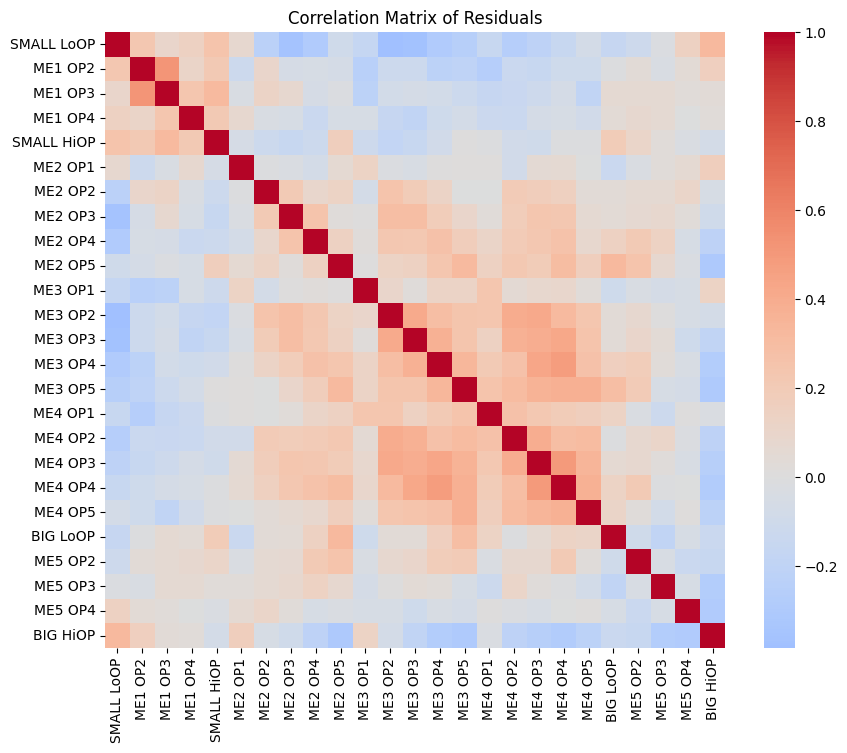

In [ ]:
#Correlation matrix with model 3 (5 factors included)
#Extract residuals from the 5 factor model
residuals = pd.DataFrame({k: v['5-factor'] for k, v in estimation['residuals'].items()})
#Compute correlation and display results
correlation = residuals.corr()
print(correlation)
#Plot and visualize results
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Residuals')
plt.show()

The correlation matrix of residuals shows an overall low correlation between them. The correlations are generally close to zero, with slightly higher correlations appearing closer to the diagonal. This indicates that, in general, the residuals are not highly correlated across the factors.

In [ ]:
# Compute the average correlation of residuals, excluding the diagonal
avg_correlation = correlation.mask(np.eye(correlation.shape[0], dtype=bool)).stack().mean()
print(f"Average correlation of residuals (excluding diagonal): {avg_correlation}")

Average correlation of residuals (excluding diagonal): 0.04566370396168258


The average correlation of residuals is approximately 0.046, which is very close to zero. This suggests that the residuals are nearly uncorrelated, which is a good sign for the model. In statistical terms, uncorrelated residuals are often considered "white noise" or "white noise residuals", meaning that they are independant from one another. We don't have a threshold to compare to here but if the average correlation is significantly close to 0, this indicates that the model has captured most of the important information and that the errors are random meaning that the model is well specified. Here, the average correlation is still different from 0. Taking into account this ambiguity observed, we will base our final response on the GRS test (in section 4) to conclude the relevance of our model.

#### 4. Display and comment on the averages of $\vert \alpha_{i} \vert$

In [ ]:
#Average of alpha
avg_alpha=estimation['Average_const_abs']
#Display results
print("Average Absolute Value of Alpha (|α|):")
for model, value in avg_alpha.items():
    print(f"{model}: {value:.4f}")

Average Absolute Value of Alpha (|α|):
1-factor: 0.1603
3-factor: 0.1997
5-factor: 0.2069


The alpha represents the return that isn't explained by the model. If it is significantly different from 0 that means we have a relatively significant pricing error meaning the model doesn't explain the significance of the return very well. We will be able to dive deeper in this issue in the GRS test that'll allow us to study the significance of our alphas.

Nevertheless, we notice that the alphas of the models 1, 2 and 3 are very close but still increase progressively as we add more factors. In this case, we can assume that adding factors increases the pricing error suggesting speficiation errors or missing factors in this model since the marginal error increases (because the alpha is supposed to decrease as the model improves).

# IV. GRS test (Gibbon, Ross and Shanken (1989)) of frontier efficiency
                                    
#### 1. Programming and execution of the test
Build a function performing the GRS test and apply it to the different sets of factors (1, then 3, then 5 factors)

In [ ]:
from scipy.stats import f

# GRS Test Function
def grs_test(estimation, df_factor_m, excess_returns):
    T = len(excess_returns)  # Number of time periods
    N = len(excess_returns.columns)  # Number of portfolios

    # Extract alpha values for each model
    alphas_1 = np.array([coef['1-factor']['const'] for coef in estimation['est_coef'].values()])
    alphas_3 = np.array([coef['3-factor']['const'] for coef in estimation['est_coef'].values()])
    alphas_5 = np.array([coef['5-factor']['const'] for coef in estimation['est_coef'].values()])

    # Calculate the covariance matrix of residuals for each model
    residuals_1 = np.array([estimation['residuals'][asset]['1-factor'] for asset in excess_returns.columns]).T
    residuals_3 = np.array([estimation['residuals'][asset]['3-factor'] for asset in excess_returns.columns]).T
    residuals_5 = np.array([estimation['residuals'][asset]['5-factor'] for asset in excess_returns.columns]).T

    sigma_1 = np.cov(residuals_1, rowvar=False)*(T-1)/(T-2)
    sigma_3 = np.cov(residuals_3, rowvar=False)*(T-1)/(T-4)
    sigma_5 = np.cov(residuals_5, rowvar=False)*(T-1)/(T-6)

    # Compute factor means and covariance matrix
    factor_means_1 = df_factor_m[['Mkt-RF']].mean().values
    factor_means_3 = df_factor_m[['Mkt-RF', 'SMB', 'HML']].mean().values
    factor_means_5 = df_factor_m[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']].mean().values

    omega_1 = np.atleast_2d(np.cov(df_factor_m[['Mkt-RF']], rowvar=False))
    omega_3 = np.cov(df_factor_m[['Mkt-RF', 'SMB', 'HML']], rowvar=False)
    omega_5 = np.cov(df_factor_m[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']], rowvar=False)

     # Compute GRS statistic for each model
    grs_1 = compute_grs_statistic(T, N, alphas_1, sigma_1, factor_means_1, omega_1, 1)
    grs_3 = compute_grs_statistic(T, N, alphas_3, sigma_3, factor_means_3, omega_3, 3)
    grs_5 = compute_grs_statistic(T, N, alphas_5, sigma_5, factor_means_5, omega_5, 5)

    # Calculate p-values for each GRS statistic
    p_value_1 = calculate_p_value(grs_1, N, T, 1)
    p_value_3 = calculate_p_value(grs_3, N, T, 3)
    p_value_5 = calculate_p_value(grs_5, N, T, 5)

    # Return the results
    return {
        'GRS_1-factor': {'stat': grs_1, 'p_value': p_value_1},
        'GRS_3-factor': {'stat': grs_3, 'p_value': p_value_3},
        'GRS_5-factor': {'stat': grs_5, 'p_value': p_value_5}
    }

# Compute GRS statistic
def compute_grs_statistic(T, N, alphas, sigma, factor_means, omega, k):
    alpha_T_sigma_alpha = alphas.T @ np.linalg.inv(sigma) @ alphas
    factor_term = factor_means.T @ np.linalg.inv(omega) @ factor_means
    W = (T * (T - N - k)) / (N * (T - k - 1)) * (1 - factor_term) * alpha_T_sigma_alpha
    return W

# Calculate p-value for the GRS statistic
def calculate_p_value(grs_stat, N, T, k):
    df1 = N
    df2 = T - N - k
    return 1 - f.cdf(grs_stat, df1, df2)

In [ ]:
# Run the GRS test
grs_results = grs_test(estimation, df_factor_m, excess_returns)

# Display results
for model, result in grs_results.items():
    print(f"{model}: GRS Statistic = {result['stat']:.4f}, p-value = {result['p_value']:.4f}")

GRS_1-factor: GRS Statistic = 13.8908, p-value = 0.0000
GRS_3-factor: GRS Statistic = 16.2371, p-value = 0.0000
GRS_5-factor: GRS Statistic = 14.7990, p-value = 0.0000


#### 2. Test result feedback
Report the test answers for each of the three sets of factors. Is there a set of factors for which the $\alpha_{i}$ are all simultaneously equal to 0?

##### **GRS_1-factor:**

*   GRS Statistic = 13.8908
*   p-value = 0.0000

The p-value is very small, which means we reject the null hypothesis that all alphas are equal to zero. This suggests that the market factor alone (1-factor model) does not fully explain the excess returns of the portfolios, and there is evidence that at least some of the alphas are non-zero.

##### **GRS_3-factor:**

*   GRS Statistic = 16.2371
*   p-value = 0.0000

The p-value is again very small, which means we reject the null hypothesis that all alphas are equal to zero. This suggests that the 3-factor model (Market, SMB, HML) does not fully explain the returns either, and there is strong evidence that at least some of the alphas are non-zero. The additional factors improve the model, but they still leave some unexplained variation in the returns.

##### **GRS_5-factor:**

*   GRS Statistic = 14.7990
*   p-value = 0.0000

Similarly, the p-value is very small, meaning we reject the null hypothesis that all alphas are zero. This suggests that the 5-factor model (Market, SMB, HML, RMW, CMA) also does not fully explain the returns, and there is evidence of significant alphas remaining. Even with the five factors, there is still unexplained variation in the returns.

##### **Comparisons:**

* The GRS statistic is highest for the 3-factor model (16.2371), suggesting that it performs the worst among the three models tested.
* The 5-factor model slightly improves upon the 3-factor model (GRS statistic drops to 14.7990), but it still fails to fully explain the returns.
* The 1-factor model has the lowest GRS statistic (13.8908), but it is still inadequate.

Despite the inclusion of additional factors, none of the models fully explain the portfolio returns, as evidenced by the significant GRS statistics and p-values of 0.0000. This suggests that other factors or variables may be needed to better capture the returns' dynamics, or that the portfolios have non-systematic risk components that the models do not account for.




### **Feedback Summary:**
For all three models (1-factor, 3-factor, and 5-factor), the GRS statistic is significant (p-value = 0.0000), leading to the rejection of the null hypothesis. This implies that none of the models (whether the market factor alone, the 3-factor model, or the 5-factor model) are able to fully explain the returns of the portfolios. Therefore, we cannot say that the alphas are all simultaneously equal to zero in any of the factor models.

The Fama-Frech model was created in the 1990s and it worked well on the data during that period. The question is: Why did the model perform well in the 1990s but display pricing errors when applied to today's stocks?

This can be attributed to two key changes in the market:  

Firstly, during the 1990s, the macroeconomic environments was relatively stable, characterized by a more stable interest rates and consistent economic growth. This stability allowed for a clearer risk-return relationship across different factors. In contrast, today’s market has been shaped by significant extreme events, including the 2008 financial crisis, the COVID-19, and the 2015 European crisis, along with unconventional monetary policies that have led to lower and more volatile interest rates. Such instabilities makes it more challenging for the model capture and explain the stock returns accurately.

Secondly, the level of efficiency has changed dramatically over the past decades. In 1990s, the market is less efficient, allowing for an easier identification of pricing inefficiencies and mispricings in stocks. However, today's financial markets have become far more efficient due to the rise of high-frequency trading, algorithmic trading, and global access to real-time information. These technological advancements made it more difficult for traditional factors like size (SMB) or value (HML) to consistently outperform, as the market has become more proficient at pricing stocks accurately, leaving fewer inefficiencies for investors to exploit.

# Systemic Risk Prediction with Predicted VaR

Value at Risk (VaR) is a widely used metric in risk management to estimate the potential loss of an asset or portfolio within a given confidence level. For this part, you will calculate the predicted VaR for a set of financial institutions. The predicted VaR formula is defined as:

$$
\text{VaR}_{i,t+1}^\alpha = \sigma_{i,t+1} \cdot \phi
$$

where:

- $\sigma_{i,t+1}$ is the predicted volatility of company $i$ for the next time period.
- $\phi$ is the $\alpha$ (take 5%) quantile of the standard normal distribution.

#### 1. Data Download
1. Download daily stock price data for the following financial institutions from Yahoo Finance:

- Companies: ‘JPM’, ‘BAC’, ‘C’, ‘WFC’, ‘GS’
- Date Range: January 1, 2020, to December 31, 2023.

2. Compute daily log returns from the downloaded price data.
    

In [ ]:
import yfinance as yf

In [ ]:
# Companies concerned
companies = ["JPM", "BAC", "C", "WFC", "GS"]

# Download stock data
data = yf.download(companies, start = '2020-01-01', end = '2023-12-31')['Adj Close']

# Remove time from the index
data.index = data.index.date

data

[*********************100%***********************]  5 of 5 completed


Ticker            BAC          C          GS         JPM        WFC
2020-01-02  31.472912  67.122932  207.329208  122.104630  47.053123
2020-01-03  30.819433  65.858643  204.904800  120.493263  46.764240
2020-01-06  30.775272  65.652054  207.001785  120.397453  46.484108
2020-01-07  30.572168  65.081902  208.364426  118.350616  46.098934
2020-01-08  30.881250  65.577698  210.372940  119.273857  46.239002
...               ...        ...         ...         ...        ...
2023-12-22  32.600403  49.034466  371.647156  163.495819  47.913597
2023-12-26  33.019737  49.497234  372.584473  164.462723  48.361752
2023-12-27  33.000233  49.612926  375.386597  165.449173  48.059738
2023-12-28  33.039242  49.670776  377.270935  166.328201  48.205872
2023-12-29  32.834446  49.593643  376.646118  166.132858  47.952568

[1006 rows x 5 columns]

In [ ]:
# Log Returns of stock prices of companies
log_returns = np.log(data/data.shift(1)).dropna()
log_returns = log_returns * 100
log_returns

Ticker           BAC         C        GS       JPM       WFC
2020-01-03 -2.098161 -1.901543 -1.176250 -1.328426 -0.615852
2020-01-06 -0.143398 -0.314167  1.018208 -0.079553 -0.600832
2020-01-07 -0.662158 -0.872262  0.656110 -1.714677 -0.832066
2020-01-08  1.005915  0.758905  0.959334  0.777101  0.303365
2020-01-09  0.171439  0.903174  2.015221  0.364436 -0.170523
...              ...       ...       ...       ...       ...
2023-12-22  0.690372  0.512518  0.021007 -0.059731 -0.547516
2023-12-26  1.278072  0.939352  0.251889  0.589652  0.931000
2023-12-27 -0.059087  0.233446  0.749264  0.598010 -0.626446
2023-12-28  0.118150  0.116535  0.500717  0.529892  0.303605
2023-12-29 -0.621785 -0.155402 -0.165760 -0.117513 -0.526847

[1005 rows x 5 columns]

#### 2. Model Selection
1. Choose an appropriate GARCH model to estimate predicted volatility.

2. Determine the optimal lags using the Bayesian Information Criterion (BIC).

In [ ]:
!pip install arch
from arch import arch_model

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.1/985.1 kB 11.5 MB/s eta 0:00:00


In [ ]:
# We are supposed to find a best garch model for each institution and the procedure for all is the same
# Here we initialize a dictionary to store all the optimal garch models for institutions
optimal_garch_model = {}

# Use a loop in order to not repeat the same procedure for each institution

for institution in companies:
    insti_log_returns = log_returns[institution].dropna()

    best_bic = np.inf
    best_model = None
    best_order = None

    # Iterate over possible combinations of (p, q) lags
    for p in range(1, 6):  # AR lags
        for q in range(1, 6):  # MA lags
                model = arch_model(insti_log_returns, vol='Garch', p=p, q=q).fit()
                bic = model.bic

                # Update the best model if the current BIC is lower
                if bic < best_bic:
                    best_bic = bic
                    best_model = model
                    best_order = (p, q)

    # Store the results for the institution
    optimal_garch_model[institution] = {
        'best_bic': best_bic,
        'best_model': best_model,
        'best_order': best_order,
    }


Iteration:      1,   Func. Count:      6,   Neg. LLF: 113700977557.89648
Iteration:      2,   Func. Count:     14,   Neg. LLF: 3531393173.492528
Iteration:      3,   Func. Count:     22,   Neg. LLF: 2184.794198934981
Iteration:      4,   Func. Count:     29,   Neg. LLF: 2059.032137540984
Iteration:      5,   Func. Count:     37,   Neg. LLF: 1974.0641811985574
Iteration:      6,   Func. Count:     42,   Neg. LLF: 1974.0585379899253
Iteration:      7,   Func. Count:     47,   Neg. LLF: 1974.0583735742368
Iteration:      8,   Func. Count:     52,   Neg. LLF: 1974.0583679074375
Iteration:      9,   Func. Count:     56,   Neg. LLF: 1974.0583679086667
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1974.0583679074375
            Iterations: 9
            Function evaluations: 56
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      7,   Neg. LLF: 5642.399083808245
Iteration:      2,   Func. Count:     18,   Neg. LLF: 58249840332.

In [ ]:
# Display the results
for institution, result in optimal_garch_model.items():
    print(f"Institution: {institution}")
    print(f"Best GARCH model order (p, q): {result['best_order']}")
    print(f"Best BIC: {result['best_bic']}")
    print(f"Model Summary:\n{result['best_model'].summary()}")
    print("\n" + "="*50 + "\n")

Institution: JPM
Best GARCH model order (p, q): (1, 1)
Best BIC: 3975.7677070968475
Model Summary:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                    JPM   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1974.06
Distribution:                  Normal   AIC:                           3956.12
Method:            Maximum Likelihood   BIC:                           3975.77
                                        No. Observations:                 1005
Date:                Thu, Jan 02 2025   Df Residuals:                     1004
Time:                        21:29:37   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
--------------------------------------

#### 3. Rolling Window Volatility Estimation
Use one year rolling window to estimate $\sigma_{i,t+1}$ for each company at each time t+1 using the selected GARCH model.


In [ ]:
# Rolling window size
rolling_window = 252  # One year of trading days

# Dictionary to store volatility forecasts for each institution
volatility_forecasts = {}

# Loop through each institution
for institution, result in optimal_garch_model.items():
    insti_log_returns = log_returns[institution].dropna()
    best_order = result['best_order']  # Best (p, q) order from the model selection
    vol_forecasts = []

    # Perform rolling window estimation
    for start in range(len(insti_log_returns) - rolling_window):
        train_data = insti_log_returns[start : start + rolling_window]
        model = arch_model(train_data, vol='Garch', p=best_order[0], q=best_order[1]).fit()
        forecast = model.forecast(horizon=1)
        vol_forecasts.append(np.sqrt(forecast.variance.values[0, 0]))

    # Store the volatility forecasts in the dictionary
    forecast_index = insti_log_returns.index[rolling_window:]
    volatility_forecasts[institution] = pd.Series(vol_forecasts, index=forecast_index)

    print(f"Completed rolling forecasts for {institution}")

# Convert the forecasts dictionary to a DataFrame for easy analysis
volatility_forecasts_df = pd.DataFrame(volatility_forecasts)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Iteration:      5,   Func. Count:     30,   Neg. LLF: 503.205187128933
Iteration:      6,   Func. Count:     35,   Neg. LLF: 503.0460888750857
Iteration:      7,   Func. Count:     40,   Neg. LLF: 503.02431894775884
Iteration:      8,   Func. Count:     45,   Neg. LLF: 503.02276125562713
Iteration:      9,   Func. Count:     50,   Neg. LLF: 503.02239203422386
Iteration:     10,   Func. Count:     55,   Neg. LLF: 503.0222862894433
Iteration:     11,   Func. Count:     60,   Neg. LLF: 503.02227114188616
Iteration:     12,   Func. Count:     65,   Neg. LLF: 503.0222700760679
Iteration:     13,   Func. Count:     69,   Neg. LLF: 503.02227015597737
Optimization terminated successfully    (Exit mode 0)
            Current function value: 503.0222700760679
            Iterations: 13
            Function evaluations: 69
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      6,   Neg. LLF: 625.054

In [ ]:
volatility_forecasts_df

JPM       BAC         C       WFC        GS
2021-01-04  1.525915  1.594924  1.885443  2.195396  2.012948
2021-01-05  1.518053  1.593373  2.267864  2.156802  1.858880
2021-01-06  1.391631  1.518355  2.473927  2.390702  1.971524
2021-01-07  2.952446  3.785062  3.873773  4.001581  2.970087
2021-01-08  3.063485  3.340901  3.306936  3.693896  2.809922
...              ...       ...       ...       ...       ...
2023-12-22  1.036814  1.829798  1.567085  1.741417  1.489212
2023-12-26  1.015221  1.733521  1.491008  1.635456  1.408748
2023-12-27  0.997435  1.674448  1.452221  1.561680  1.368785
2023-12-28  0.975234  1.575888  1.399285  1.505565  1.373654
2023-12-29  0.951117  1.495419  1.359295  1.439072  1.362412

[753 rows x 5 columns]

#### 4. Predicted VaR Calculation
1. Calculate the predicted VaR for each institution.

2. Visualize the predicted VaR time series.

3. Is there any ways to improve the Accuracy of VaR Prediction?

In [ ]:
# 5% quantile of the standard normal distribution
phi = -1.645

# Calculate VaR for all institutions
predicted_var_dict = {}

for institution in volatility_forecasts_df.columns:
    predicted_var_dict[institution] = volatility_forecasts_df[institution] * phi

# Combine all into a DataFrame
predicted_var_df = pd.DataFrame(predicted_var_dict)

predicted_var_df

JPM       BAC         C       WFC        GS
2021-01-04 -2.510130 -2.623650 -3.101553 -3.611427 -3.311300
2021-01-05 -2.497197 -2.621098 -3.730637 -3.547940 -3.057857
2021-01-06 -2.289232 -2.497695 -4.069611 -3.932704 -3.243157
2021-01-07 -4.856774 -6.226427 -6.372357 -6.582600 -4.885794
2021-01-08 -5.039432 -5.495782 -5.439909 -6.076459 -4.622321
...              ...       ...       ...       ...       ...
2023-12-22 -1.705559 -3.010018 -2.577855 -2.864631 -2.449754
2023-12-26 -1.670038 -2.851642 -2.452709 -2.690326 -2.317391
2023-12-27 -1.640781 -2.754468 -2.388904 -2.568963 -2.251651
2023-12-28 -1.604260 -2.592336 -2.301823 -2.476654 -2.259660
2023-12-29 -1.564587 -2.459965 -2.236041 -2.367273 -2.241168

[753 rows x 5 columns]

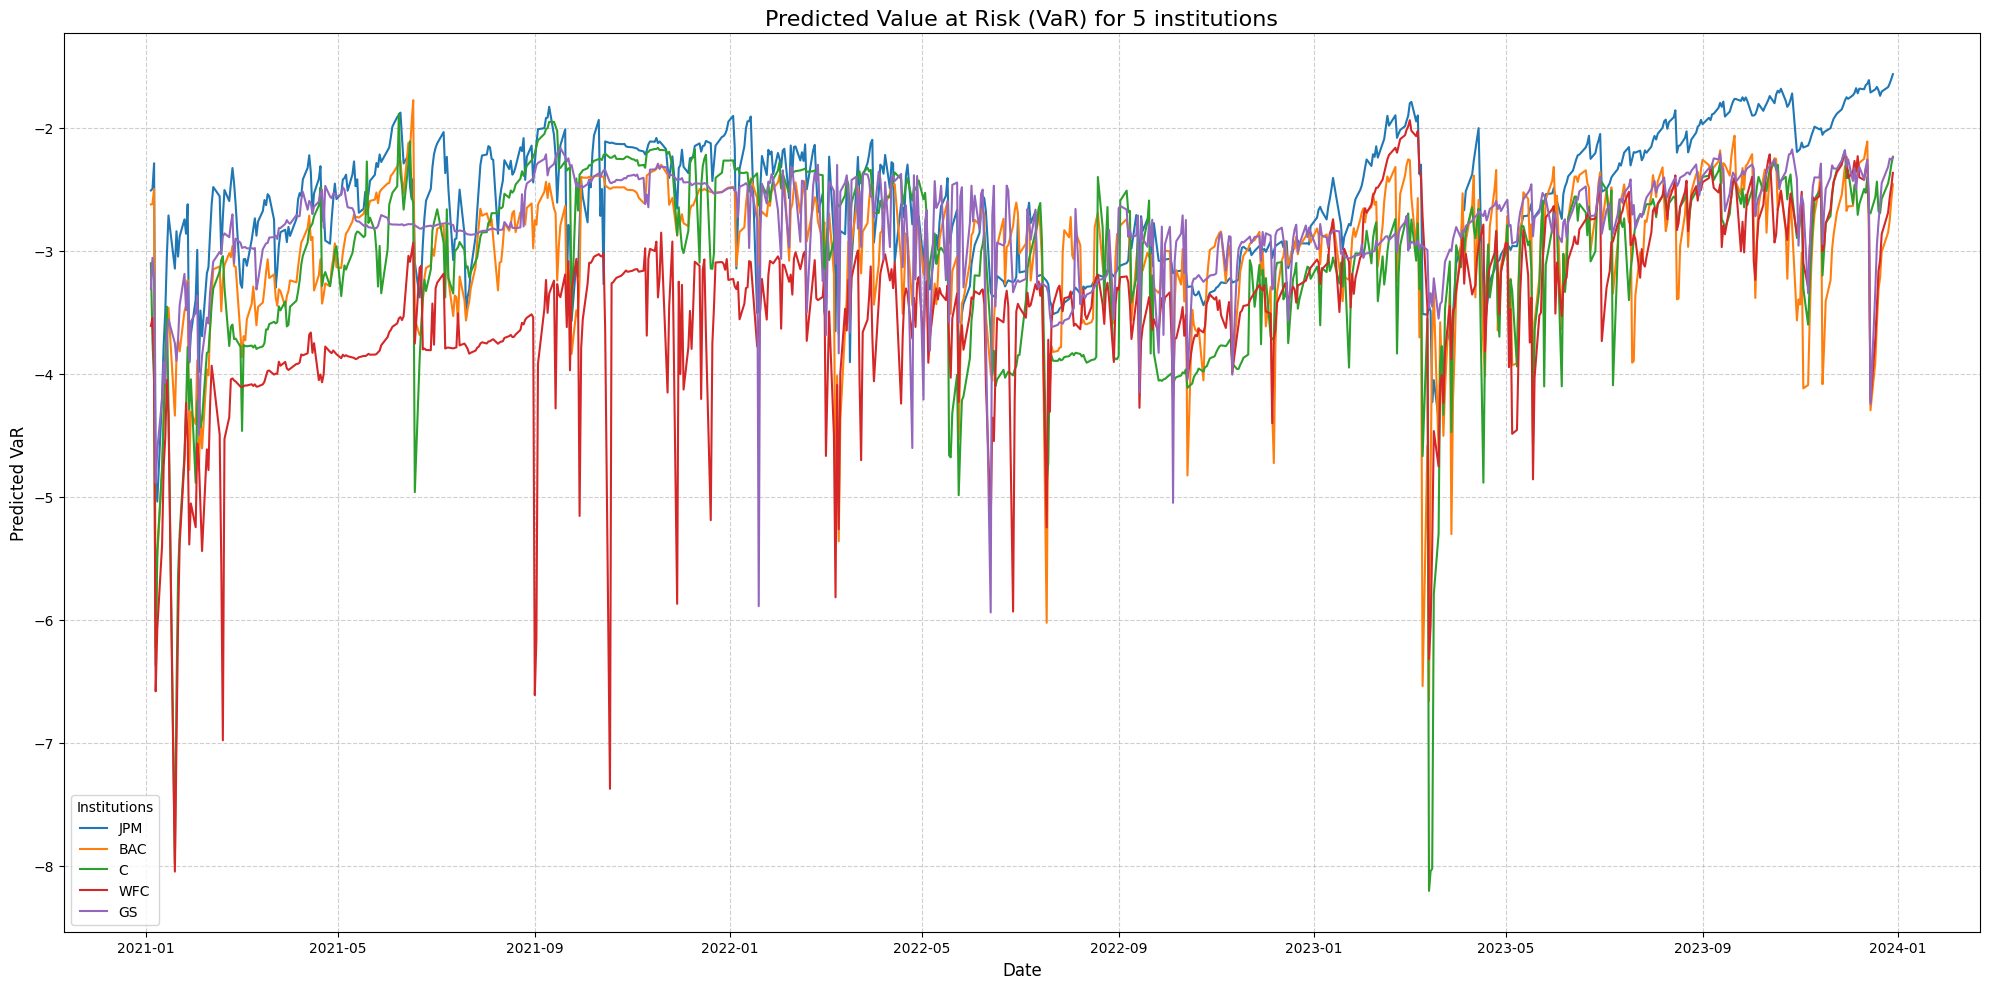

In [ ]:
# Plot all the VaR on one graph
plt.figure(figsize=(20, 10))

for institution in predicted_var_df.columns:
  plt.plot(predicted_var_df.index, predicted_var_df[institution], label=institution)

# Customize the plot
plt.title("Predicted Value at Risk (VaR) for 5 institutions", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Predicted VaR", fontsize=12)
plt.legend(title="Institutions", fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

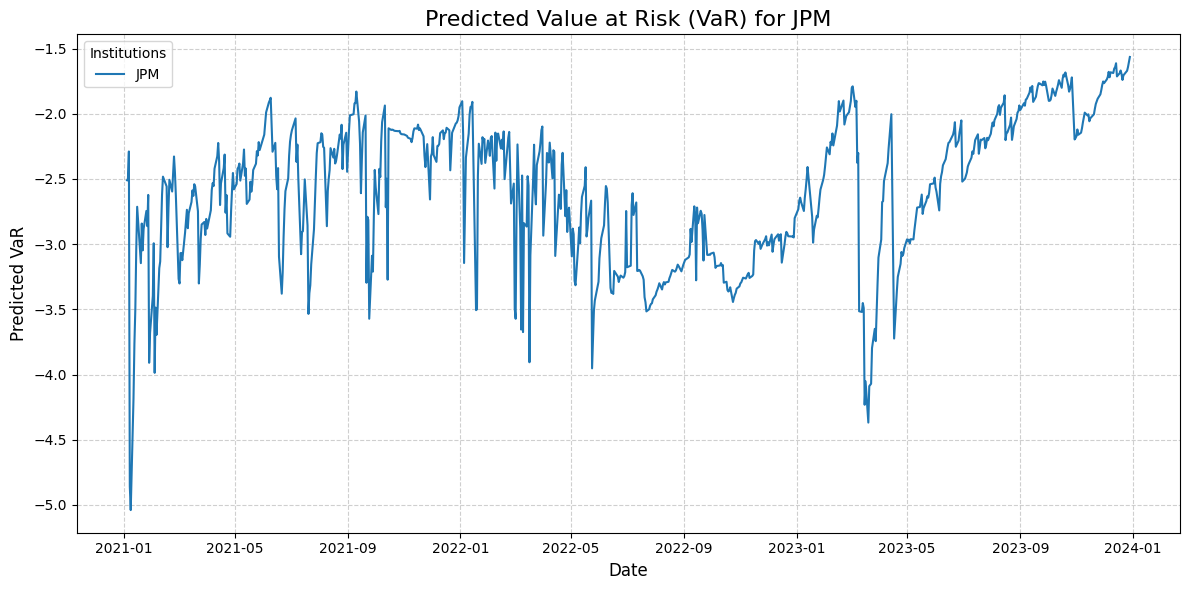

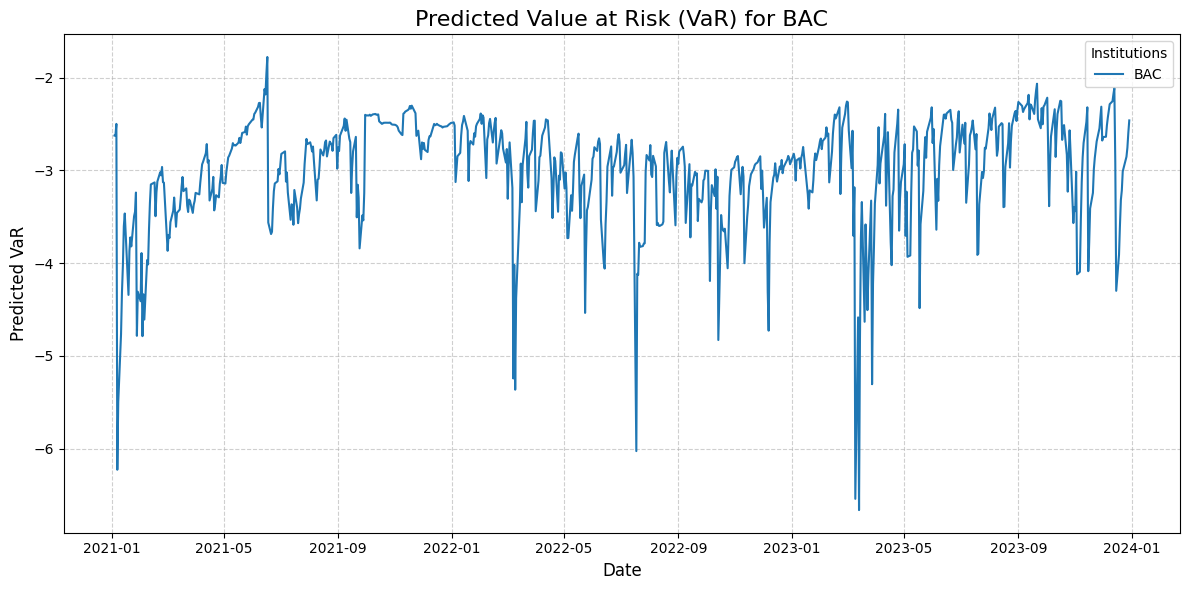

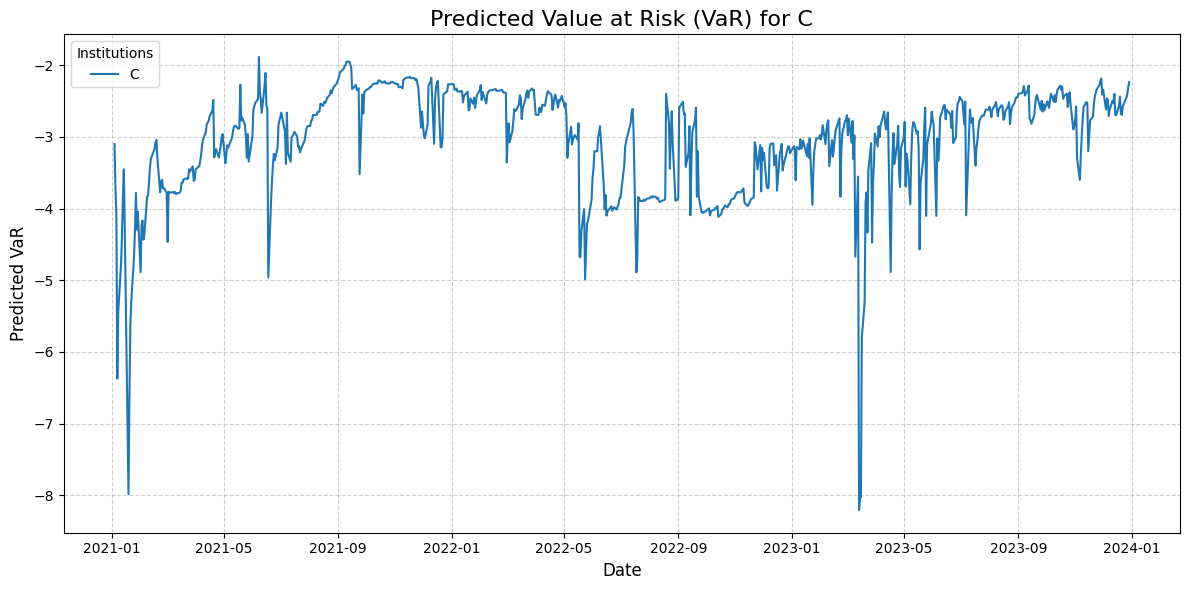

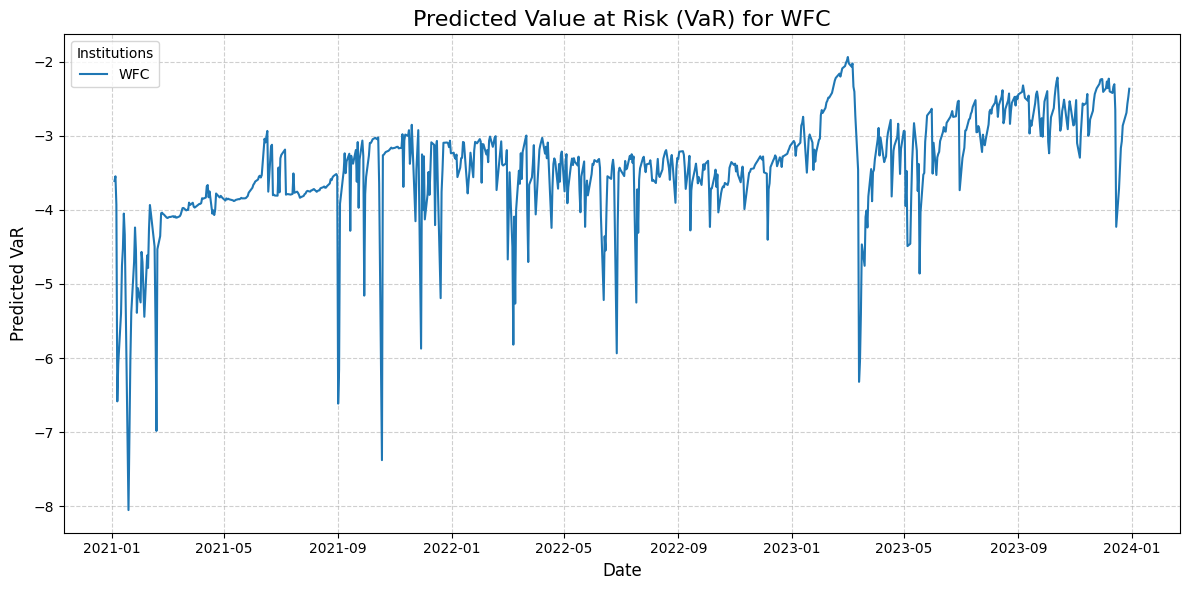

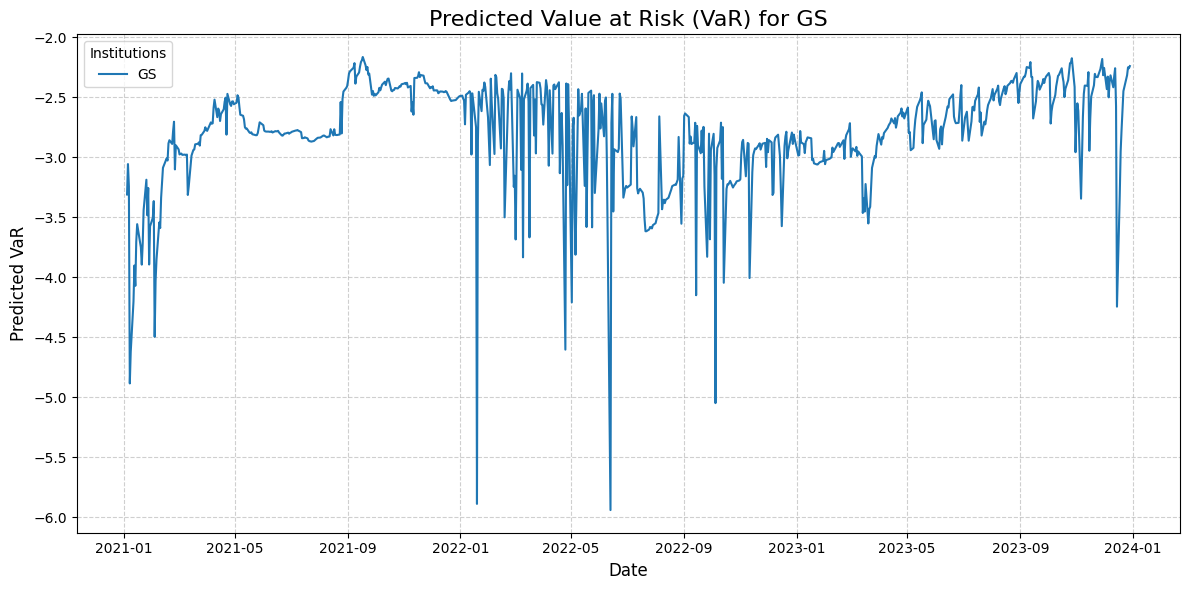

In [ ]:
# Plot VaR of each institution on each graph
for institution in predicted_var_df.columns:
  plt.figure(figsize=(12, 6))
  plt.plot(predicted_var_df.index, predicted_var_df[institution], label=institution)

    # Customize the plot
  plt.title(f"Predicted Value at Risk (VaR) for {institution}", fontsize=16)
  plt.xlabel("Date", fontsize=12)
  plt.ylabel("Predicted VaR", fontsize=12)
  plt.legend(title="Institutions", fontsize=10)
  plt.grid(True, linestyle='--', alpha=0.6)
  plt.tight_layout()

  # Show the plot
  plt.show()


The VaR curves exhibit significant and frequent fluctuations, indicating high and persistent volatility in the underlying assets. This suggests that the stock values of these institutions experienced substantial and rapid changes during the period depicted in the graph.

Pronounced peaks in the VaR curves are observed, particularly post-COVID-19, likely reflecting the impact of the pandemic and its aftermath on the institutions' sectors. These peaks signal a significant increase in the risk of substantial losses during these periods.

The trajectories of the VaR curves vary considerably across institutions, highlighting distinct risk profiles. Notably, JPM and WFC demonstrate more pronounced swings and peaks, suggesting greater sensitivity to market fluctuations. This may be attributed to factors such as their business activities, sector exposure, or financial structure. In contrast, MS exhibits the least pronounced fluctuations, suggesting lower sensitivity to market movements among the institutions analyzed.

To resume, we start by choosing the best GARCH model for each institution and then using the chosen model and a rolling window to predict the future volatility of each institution's stock price. And then, we apply the formula to compute the predicted VaR.

This approach allows us to capture changing volatility overtime, both short-term and long-term volatility trends, which leads to a better risk forecast.

However, this approach has a huge limitation is that it assumes the returns of stocks are normally distributed, which may not always hold, especially in the case of extreme events. And in our case, we consider 2020-2023 period, which is post-Covid 19 period, in consequences, the normal distribution assumption leads a worse prediction. Moreover, the GARCH models are linear in nature and might not fully capture non-linear relationships or interactions in complexe portfolios.

One way to improve the accuracy of this approach is stress testing and scenario analyse. This helps us to evaluate the model's performance under extreme, but plausible market events, which might not be well-captured by the normal distribution.

The other way is to use another method such as Monte-Carlo simulations which is a more complexe approach. It involves generating a large number of random scenarios (simulations) of future stock price paths based on certain assumptions about volatility, drift, and distribution. The key advantage is that this method doesn't rely on the normal distribution assumption and can incorporate any distribution that best fits the stock price behavior, such as the Student's t-distribution, which is often used to model the fat tails and skewness seen in financial data.

And, we can also use backtesting techniques to evaluate your model's performance, for example Kupiec Test. This test specifically checks if the observed exceptions are consistent with the expected number, given the confidence level used in the VaR model. (An exception occurs when the actual loss on a given day exceeds the predicted VaR for that day).










# **Conclusion**

All five factors used in the models are correlated with one another to some extent, meaning that changes in one factor can often lead to changes in the others. These factors are not isolated, as they are influenced by broader market conditions. Additionally, extreme events, such as financial crises or market shocks, can have a disproportionate impact on these factors.

Smaller portfolios tend to have higher average returns and outperform larger ones, primarily due to lower liquidity and potential underpricing. Additionally, portfolios with higher operational profitability also show higher returns, as they are less risky and benefit from stronger cash flows.

In the first model, larger portfolios (ME5 and BIG) have a beta smaller than one, meaning they are less sensitive to market movements and carry less systematic risk. This finding is consistent with the observation that larger portfolios generally have lower average returns.

On the other hand, the CMA factor doesn’t appear to have much explanatory power when it comes to the variation in returns.

Regarding the residuals, they are only weakly correlated, but the alphas increased as more factors were added. This suggests that there may be specification errors and a higher margin of error, a conclusion that was confirmed by the GRS test.

In the last part, We apply GARCH models to predict future volatility and calculate VaR, capturing both short- and long-term trends. However, the assumption of normally distributed returns can lead to poor predictions, especially during extreme events like the post-COVID period. To improve accuracy, we can use stress testing, scenario analysis, or Monte Carlo simulations, which account for fat tails and skewness, and validate the model with backtesting methods.

However, it’s important to acknowledge the model’s limitations. First, it relies on historical data, making it less reliable for predictions during crises, as it assumes the future will mirror the past. Second, it is primarily based on the U.S. market, which complicates its application to international markets. Additionally, significant risks such as credit risk and interest rate risk are not accounted for in this model.